# Mount Drive & Set Path

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/My Drive/Colab Notebooks/Face_Recognition/FaceNet_Model

/content/drive/My Drive/Colab Notebooks/Face_Recognition/FaceNet_Model


In [9]:
path='/content/drive/My Drive/Colab Notebooks/Face_Recognition/FaceNet_Model'

# Import Library & get Image from drive

In [10]:
import os
import glob

In [11]:
# Get Image names stored in "Images" folder
imageEncode_path_names=[]
personEncode_names=set()
for file_name in glob.glob(path+'/Test_MTCNN_crop/*/*.jpg*'):
  imageEncode_path_names.append(file_name)
  personEncode_names.add(imageEncode_path_names[-1].split('/')[-1])
  #print(imageEncode_path_names[-1].split('/')[-1])

In [12]:
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, concatenate
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.core import Dense, Activation, Lambda, Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import model_from_json
#from tensorflow.keras.layers.merge import Concatenate
from tensorflow.keras import backend as K

from os import listdir
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# FaceNet face recognition

ติดตั้ง keras_facenet library

In [13]:
!pip install keras_facenet

     |████████████████████████████████| 2.3 MB 5.1 MB/s 
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10385 sha256=5c9a13cd14c4e0d0943ad0c6b5e71563b7459a7415bf08b20e4d830a91943693
  Stored in directory: /root/.cache/pip/wheels/2b/76/1a/a29ceb07bfca098e2b0bc8690d550753a0384cbed26d5f47ee
Successfully built keras-facenet


In [14]:
from keras_facenet import FaceNet
embedder = FaceNet()

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import csv
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [16]:
img=load_img(path+'/Test_MTCNN_crop/1/m_1_1.jpg',target_size=(160,160))
img=img_to_array(img)
img=np.expand_dims(img,axis=0)
img=preprocess_input(img)

In [17]:
img.shape

(1, 160, 160, 3)

In [ ]:
img_encode = embedder.embeddings(img)
img_encode

array([[ 0.07540142, -0.06633385, -0.05915075,  0.04504296, -0.02268928,
         0.10122301, -0.0469156 ,  0.05591654, -0.05294726, -0.03723318,
        -0.02196775,  0.07434267,  0.00669897, -0.06460532,  0.02221718,
        -0.02725158,  0.02766597,  0.00712759,  0.05167964, -0.09553269,
        -0.05934186,  0.009128  ,  0.0544583 , -0.02715898,  0.0268997 ,
         0.00889629,  0.0275015 , -0.01700567, -0.02174172, -0.00562056,
         0.01057177,  0.02596775,  0.01147741,  0.00651437, -0.02448535,
        -0.0007375 , -0.02579977,  0.01189925, -0.10418237,  0.01861068,
         0.02660821,  0.02525607, -0.01205423, -0.05961126,  0.01291469,
        -0.00080812,  0.04731786,  0.04073922, -0.0981736 , -0.03710594,
         0.03134675,  0.04557009,  0.05936117, -0.02131895, -0.0544913 ,
         0.07683951,  0.04166197,  0.07058798,  0.00456489,  0.04892857,
        -0.06293601,  0.06525205, -0.02967251, -0.01304172,  0.00683642,
         0.06595483,  0.0360234 , -0.04648649, -0.0

In [ ]:
img_encode.shape

(1, 512)

# Encoding

## setup

สร้าง DataFrame ว่างขึ้นมาสำหรับเก็บชุดตัวเลขจากการทำ Encoding

In [ ]:
df = pd.DataFrame(img_encode)
df.insert(0, "image_name", "w_1_2.jpg")
df = df.iloc[1: , :]
df

,image_name,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511


In [ ]:
df = None

for filename in imageEncode_path_names:
  imgCSV = load_img(filename, target_size=(160,160))
  imgCSV = img_to_array(imgCSV)
  imgCSV = np.expand_dims(imgCSV,axis=0)
  #imgCSV = preprocess_input(imgCSV)
  img_encodeCSV = embedder.embeddings(imgCSV)
  df555 = pd.DataFrame(img_encodeCSV)
  df555.insert(0, "image_name", filename.split("/")[-1])
  df = pd.concat([df,df555], axis=0)
  #df.append(df555, ignore_index=True)
  print(df)

Streaming output truncated to the last 5000 lines.
     image_name         0         1         2         3         4         5  \
0    m_11_1.jpg -0.008970  0.003528  0.013779  0.036319  0.014387  0.021049   
0    m_11_4.jpg -0.017343  0.015675 -0.018884  0.039702  0.064012 -0.004646   
0    m_11_2.jpg -0.015703 -0.008189  0.002563  0.045419 -0.000259  0.035754   
0    m_11_5.jpg -0.016794  0.032309 -0.008307  0.036734  0.072451  0.017271   
0    m_11_3.jpg  0.001771 -0.029109 -0.002357  0.042051  0.029740  0.036521   
..          ...       ...       ...       ...       ...       ...       ...   
0    w_44_7.jpg  0.047001  0.019582 -0.009526 -0.000510  0.004086 -0.021351   
0   w_44_10.jpg  0.052600  0.023442  0.002556 -0.000769  0.004894 -0.049052   
0    w_44_9.jpg  0.063011  0.007222  0.008817 -0.006022  0.007905 -0.046157   
0   w_44_13.jpg  0.053451  0.013147  0.027986 -0.009775  0.009078 -0.046452   
0   w_44_11.jpg  0.050304  0.010140  0.010456  0.012999  0.006198 -0.046299   



In [ ]:
df

,image_name,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,m_11_1.jpg,-0.008970,0.003528,0.013779,0.036319,0.014387,0.021049,-0.082872,0.054328,-0.004707,...,-0.012539,-0.047265,-0.053251,0.010705,-0.000820,0.011487,0.070252,-0.042531,0.007138,-0.013628
0,m_11_4.jpg,-0.017343,0.015675,-0.018884,0.039702,0.064012,-0.004646,-0.068178,0.079573,0.008000,...,0.036424,-0.106101,-0.034141,0.049120,-0.025884,0.014175,0.085480,-0.018707,-0.004680,0.019183
0,m_11_2.jpg,-0.015703,-0.008189,0.002563,0.045419,-0.000259,0.035754,-0.097726,0.052439,-0.020221,...,-0.011993,-0.057026,-0.069637,0.025575,-0.017198,-0.008624,0.029623,-0.019010,0.013952,0.008860
0,m_11_5.jpg,-0.016794,0.032309,-0.008307,0.036734,0.072451,0.017271,-0.087814,0.048260,0.023746,...,0.024267,-0.099506,-0.026567,0.034224,-0.009124,-0.005160,0.087996,-0.004587,0.047062,0.009056
0,m_11_3.jpg,0.001771,-0.029109,-0.002357,0.042051,0.029740,0.036521,-0.095367,0.045065,0.008446,...,0.040494,-0.083363,-0.006412,0.022944,0.002594,-0.000670,0.071010,0.024962,0.008595,0.035855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,w_51_12.jpg,0.051454,-0.070043,0.003267,0.009318,-0.047295,0.024738,-0.024131,0.002596,0.053099,...,-0.034014,0.040575,-0.009093,0.051614,0.045043,0.019872,-0.046675,-0.048555,-0.071358,-0.000532
0,w_51_15.jpg,0.058091,-0.076813,0.013091,0.003444,-0.045093,0.042757,-0.037376,0.027005,0.015665,...,-0.062098,0.015061,-0.030911,0.069447,0.055572,0.003740,-0.043946,-0.082737,-0.076041,0.006355
0,w_51_14.jpg,0.049272,-0.065243,0.015230,-0.019571,-0.041855,0.046872,-0.039517,0.022571,0.048657,...,-0.043770,0.007566,-0.033266,0.044809,0.052361,-0.015871,-0.059040,-0.061361,-0.067112,0.008656
0,w_51_16.jpg,0.073976,-0.051355,0.027857,-0.013213,-0.028412,0.021803,-0.059356,0.030290,0.032308,...,-0.082848,0.003332,-0.029067,0.018009,0.038797,-0.014631,-0.067591,-0.036266,-0.036843,-0.011257


In [ ]:
df.to_csv('facenet_encode.csv', index=False)

# Distance

## import csv

In [18]:
import pandas as pd
import numpy as np

In [19]:
facenet_encode = pd.read_csv(path+'/facenet_encode.csv')

## setup

In [20]:
facenet_imgName = facenet_encode["image_name"] #เก็บชื่อรูปภาพไว้ก่อนเอาออก เพื่อจะนำไปใส่กลับไปทีหลัง
facenet_encode = facenet_encode.drop('image_name', 1) #เอา col ชื่อรูปภาพ ออกก่อน เพื่อจะนำไปคำนวนหา distance

## หา distance

In [21]:
pip install scipy

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

A =  facenet_encode
A_sparse = sparse.csr_matrix(A)

similarities = cosine_similarity(A_sparse)
print('pairwise dense output:\n {}\n'.format(similarities))

#also can output sparse matrices
similarities_sparse = cosine_similarity(A_sparse,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(similarities_sparse))

pairwise dense output:
 [[1.         0.83405717 0.87765682 ... 0.28500084 0.30171747 0.20083848]
 [0.83405717 1.         0.7969671  ... 0.2022031  0.21753736 0.12088858]
 [0.87765682 0.7969671  1.         ... 0.24274665 0.22447319 0.20013098]
 ...
 [0.28500084 0.2022031  0.24274665 ... 1.         0.83554337 0.81539778]
 [0.30171747 0.21753736 0.22447319 ... 0.83554337 1.         0.86709133]
 [0.20083848 0.12088858 0.20013098 ... 0.81539778 0.86709133 1.        ]]

pairwise sparse output:
   (0, 1799)	0.2008384766965674
  (0, 1798)	0.3017174728226016
  (0, 1797)	0.28500083538319065
  (0, 1796)	0.25646198550915983
  (0, 1795)	0.17195933624893253
  (0, 1794)	0.2730047587485838
  (0, 1793)	0.22842499824583656
  (0, 1792)	0.261781138403655
  (0, 1791)	0.19049568389892535
  (0, 1790)	0.3418509657788985
  (0, 1789)	0.27096828972868797
  (0, 1788)	0.24682354966660952
  (0, 1787)	0.34726453437137383
  (0, 1786)	0.3162099826911977
  (0, 1785)	0.2670800203549714
  (0, 1784)	0.07056321987360703
  

แปลงเป็น dataframe และนำชื่อรูปกลับมา

In [23]:
facenet_distance = pd.DataFrame(similarities)
facenet_distance.insert(0, "image_name", facenet_imgName)

In [24]:
facenet_distance

,image_name,0,1,2,3,4,5,6,7,8,...,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
0,m_11_1.jpg,1.000000,0.834057,0.877657,0.806896,0.608299,0.955451,0.938577,0.958371,0.926961,...,0.341851,0.190496,0.261781,0.228425,0.273005,0.171959,0.256462,0.285001,0.301717,0.200838
1,m_11_4.jpg,0.834057,1.000000,0.796967,0.926616,0.723877,0.842199,0.852137,0.870876,0.811191,...,0.232559,0.126705,0.167603,0.135027,0.202186,0.124562,0.178227,0.202203,0.217537,0.120889
2,m_11_2.jpg,0.877657,0.796967,1.000000,0.759888,0.644897,0.840883,0.812561,0.852063,0.812154,...,0.253091,0.107108,0.237182,0.143237,0.192262,0.106257,0.193019,0.242747,0.224473,0.200131
3,m_11_5.jpg,0.806896,0.926616,0.759888,1.000000,0.799989,0.841760,0.847060,0.852658,0.838887,...,0.180103,0.117637,0.118174,0.133128,0.169764,0.100642,0.150153,0.221730,0.184558,0.096794
4,m_11_3.jpg,0.608299,0.723877,0.644897,0.799989,1.000000,0.641877,0.659291,0.677060,0.689285,...,0.238933,0.186194,0.189351,0.182229,0.208367,0.212621,0.264575,0.299157,0.211404,0.173277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,w_51_12.jpg,0.171959,0.124562,0.106257,0.100642,0.212621,0.112708,0.120442,0.167119,0.156403,...,0.917759,0.950249,0.900458,0.951195,0.910832,1.000000,0.942193,0.857404,0.873571,0.879005
1796,w_51_15.jpg,0.256462,0.178227,0.193019,0.150153,0.264575,0.192177,0.180610,0.238974,0.207282,...,0.937222,0.890393,0.880229,0.903851,0.913656,0.942193,1.000000,0.879197,0.868688,0.843055
1797,w_51_14.jpg,0.285001,0.202203,0.242747,0.221730,0.299157,0.220155,0.187417,0.258400,0.261890,...,0.835287,0.819519,0.813104,0.810797,0.797601,0.857404,0.879197,1.000000,0.835543,0.815398
1798,w_51_16.jpg,0.301717,0.217537,0.224473,0.184558,0.211404,0.264550,0.251115,0.277401,0.271369,...,0.824004,0.893680,0.901603,0.910235,0.837391,0.873571,0.868688,0.835543,1.000000,0.867091


เปลี่ยนชื่อให้ column

In [25]:
col_name = list(facenet_distance["image_name"])
col_name.insert(0, "image_name")
facenet_distance.columns = col_name
facenet_distance

,image_name,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,...,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,m_11_1.jpg,1.000000,0.834057,0.877657,0.806896,0.608299,0.955451,0.938577,0.958371,0.926961,...,0.341851,0.190496,0.261781,0.228425,0.273005,0.171959,0.256462,0.285001,0.301717,0.200838
1,m_11_4.jpg,0.834057,1.000000,0.796967,0.926616,0.723877,0.842199,0.852137,0.870876,0.811191,...,0.232559,0.126705,0.167603,0.135027,0.202186,0.124562,0.178227,0.202203,0.217537,0.120889
2,m_11_2.jpg,0.877657,0.796967,1.000000,0.759888,0.644897,0.840883,0.812561,0.852063,0.812154,...,0.253091,0.107108,0.237182,0.143237,0.192262,0.106257,0.193019,0.242747,0.224473,0.200131
3,m_11_5.jpg,0.806896,0.926616,0.759888,1.000000,0.799989,0.841760,0.847060,0.852658,0.838887,...,0.180103,0.117637,0.118174,0.133128,0.169764,0.100642,0.150153,0.221730,0.184558,0.096794
4,m_11_3.jpg,0.608299,0.723877,0.644897,0.799989,1.000000,0.641877,0.659291,0.677060,0.689285,...,0.238933,0.186194,0.189351,0.182229,0.208367,0.212621,0.264575,0.299157,0.211404,0.173277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,w_51_12.jpg,0.171959,0.124562,0.106257,0.100642,0.212621,0.112708,0.120442,0.167119,0.156403,...,0.917759,0.950249,0.900458,0.951195,0.910832,1.000000,0.942193,0.857404,0.873571,0.879005
1796,w_51_15.jpg,0.256462,0.178227,0.193019,0.150153,0.264575,0.192177,0.180610,0.238974,0.207282,...,0.937222,0.890393,0.880229,0.903851,0.913656,0.942193,1.000000,0.879197,0.868688,0.843055
1797,w_51_14.jpg,0.285001,0.202203,0.242747,0.221730,0.299157,0.220155,0.187417,0.258400,0.261890,...,0.835287,0.819519,0.813104,0.810797,0.797601,0.857404,0.879197,1.000000,0.835543,0.815398
1798,w_51_16.jpg,0.301717,0.217537,0.224473,0.184558,0.211404,0.264550,0.251115,0.277401,0.271369,...,0.824004,0.893680,0.901603,0.910235,0.837391,0.873571,0.868688,0.835543,1.000000,0.867091


In [ ]:
facenet_distance.to_csv('facenet_distance.csv', index=False)

# FRR

## import

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## setup

In [27]:
facenet_distance = pd.read_csv(path+'/facenet_distance.csv')

import masking csv

In [28]:
facenet_masking = pd.read_csv(path+'/facenet_masking.csv')
facenet_masking

,image_name,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,...,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,m_11_1.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,m_11_4.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,m_11_2.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,m_11_5.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,m_11_3.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,w_51_12.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1796,w_51_15.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1797,w_51_14.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1798,w_51_16.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


เช็คชื่อรูปเพื่อใส่ค่าลงใน masking metrix

In [29]:
#column
col_name = list(facenet_masking)
col_name[1][:4]

'm_11'

In [30]:
for i in range(len(facenet_masking)):
  for j in range(len(col_name)):
    if facenet_masking['image_name'][i][:4] == col_name[j][:4]:
      facenet_masking.iloc[[i],[j]] = 1 #คนเดียวกัน
      if facenet_masking['image_name'][i] == col_name[j]:
        facenet_masking.iloc[[i],[j]] = np.nan #รูปเดียวกัน

In [31]:
facenet_masking

,image_name,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,...,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,m_11_1.jpg,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,m_11_4.jpg,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,m_11_2.jpg,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,m_11_5.jpg,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,m_11_3.jpg,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,w_51_12.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
1796,w_51_15.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0
1797,w_51_14.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
1798,w_51_16.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0


In [ ]:
facenet_masking.to_csv('facenet_masking_complete.csv', index=False)

In [32]:
facenet_distance_noImgName = facenet_distance.drop('image_name', 1)
facenet_masking_noImgName = facenet_masking.drop('image_name', 1)

In [33]:
facenet_frr_matric = facenet_distance_noImgName.multiply(facenet_masking_noImgName)

In [34]:
facenet_frr_matric

,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,...,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,NaN,0.834057,0.877657,0.806896,0.608299,0.955451,0.938577,0.958371,0.926961,0.963159,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.834057,NaN,0.796967,0.926616,0.723877,0.842199,0.852137,0.870876,0.811191,0.863027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.877657,0.796967,NaN,0.759888,0.644897,0.840883,0.812561,0.852063,0.812154,0.866188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.806896,0.926616,0.759888,NaN,0.799989,0.841760,0.847060,0.852658,0.838887,0.847500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.608299,0.723877,0.644897,0.799989,NaN,0.641877,0.659291,0.677060,0.689285,0.647308,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.917759,0.950249,0.900458,0.951195,0.910832,NaN,0.942193,0.857404,0.873571,0.879005
1796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.937222,0.890393,0.880229,0.903851,0.913656,0.942193,NaN,0.879197,0.868688,0.843055
1797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.835287,0.819519,0.813104,0.810797,0.797601,0.857404,0.879197,NaN,0.835543,0.815398
1798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.824004,0.893680,0.901603,0.910235,0.837391,0.873571,0.868688,0.835543,NaN,0.867091


In [ ]:
facenet_frr_matric.to_csv('facenet_frr_matric.csv', index=False)

กำหนด theshold ให้เป็น 0.01 ถึง 1.00

In [51]:
theshold_list = []
for i in range(100):
  thr = (i + 1 )/100 #กำหนด theshold
  #print(thr)
  theshold_list.append(thr)

In [52]:
facenet_frr = []
for i in range(100):
  thr = (i + 1 )/100 #กำหนด threshold เริ่มที่ 0.01 - 1.00
  facenet_frr_sum_reject = np.sum((facenet_frr_matric < thr) & (facenet_frr_matric > 0)) #นับจำนวนค่าที่มากกว่า thr และ มากกว่า 0 (จำนวน genuine sample ที่ถูก reject)
  facenet_frr_sum_reject = np.sum(facenet_frr_sum_reject)

  facenet_frr_sum_allGenuine = np.sum(facenet_frr_matric > 0) #นับจำนวนค่าที่มากกว่า 0 (จำนวน genuine sample ทั้งหมด)
  facenet_frr_sum_allGenuine = np.sum(facenet_frr_sum_allGenuine)
  
  facenet_frr_sum = facenet_frr_sum_reject / facenet_frr_sum_allGenuine #จำนวน genuine sample ที่ถูก reject(น้อยกว่า thr และมากกว่า 0) หารด้วยจำนวน genuine sample ทั้งหมด
  #facenet_frr_sum_nparray = facenet_frr_sum.values # แปลง series เป็น nparray
  facenet_frr.append(facenet_frr_sum) #รวมค่า frr

In [37]:
  thr = 0.6499999999999664
  facenet_frr_sum_reject = np.sum((facenet_frr_matric < thr) & (facenet_frr_matric > 0)) #นับจำนวนค่าที่มากกว่า thr และ มากกว่า 0 (จำนวน genuine sample ที่ถูก reject)
  facenet_frr_sum_reject = np.sum(facenet_frr_sum_reject)

  facenet_frr_sum_allGenuine = np.sum(facenet_frr_matric > 0) #นับจำนวนค่าที่มากกว่า 0 (จำนวน genuine sample ทั้งหมด)
  facenet_frr_sum_allGenuine = np.sum(facenet_frr_sum_allGenuine)
  
  facenet_frr_sum = facenet_frr_sum_reject / facenet_frr_sum_allGenuine #จำนวน genuine sample ที่ถูก reject(น้อยกว่า thr และมากกว่า 0) หารด้วยจำนวน genuine sample ทั้งหมด
  #facenet_frr_sum_nparray = facenet_frr_sum.values # แปลง series เป็น nparray
  facenet_frr.append(facenet_frr_sum) #รวมค่า frr

In [53]:
facenet_frr_sum

0.9998596786641408

In [54]:
facenet_frr

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.016066792955869e-05,
 7.016066792955869e-05,
 7.016066792955869e-05,
 0.00014032133585911737,
 0.00021048200378867606,
 0.00028064267171823475,
 0.00028064267171823475,
 0.0004209640075773521,
 0.0004911246755069108,
 0.0004911246755069108,
 0.0004911246755069108,
 0.0004911246755069108,
 0.0004911246755069108,
 0.0004911246755069108,
 0.0006314460113660282,
 0.0007016066792955869,
 0.0008419280151547042,
 0.0010524100189433804,
 0.001122570686872939,
 0.001122570686872939,
 0.001122570686872939,
 0.0011927313548024978,
 0.0011927313548024978,
 0.0014032133585911738,
 0.0017540166982389672,
 0.0017540166982389672,
 0.0019644987020276433,
 0.002104820037886761,
 0.0025959447133936716,
 0.0028765873851119062,
 0.0032975513926892584,
 0.0037185154002666106,
 0.00427980074370308,
 0.004911246755069108,
 0.005191889426787343,
 0.0060338174419420475,
 0.00680558478916719

In [40]:
import matplotlib.pyplot as plt


In [48]:
len(theshold_list)

100

In [55]:
len(facenet_frr)

100

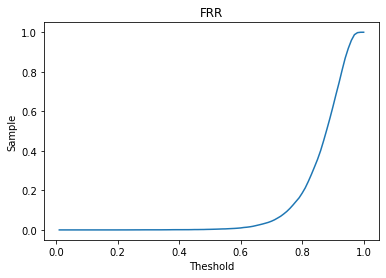

In [56]:
plt.plot(theshold_list, facenet_frr)
plt.title("FRR")
plt.xlabel('Theshold')
plt.ylabel('Sample')
plt.show()

# FAR

In [57]:
facenet_distance

,image_name,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,...,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,m_11_1.jpg,1.000000,0.834057,0.877657,0.806896,0.608299,0.955451,0.938577,0.958371,0.926961,...,0.341851,0.190496,0.261781,0.228425,0.273005,0.171959,0.256462,0.285001,0.301717,0.200838
1,m_11_4.jpg,0.834057,1.000000,0.796967,0.926616,0.723877,0.842199,0.852137,0.870876,0.811191,...,0.232559,0.126705,0.167603,0.135027,0.202186,0.124562,0.178227,0.202203,0.217537,0.120889
2,m_11_2.jpg,0.877657,0.796967,1.000000,0.759888,0.644897,0.840883,0.812561,0.852063,0.812154,...,0.253091,0.107108,0.237182,0.143237,0.192262,0.106257,0.193019,0.242747,0.224473,0.200131
3,m_11_5.jpg,0.806896,0.926616,0.759888,1.000000,0.799989,0.841760,0.847060,0.852658,0.838887,...,0.180103,0.117637,0.118174,0.133128,0.169764,0.100642,0.150153,0.221730,0.184558,0.096794
4,m_11_3.jpg,0.608299,0.723877,0.644897,0.799989,1.000000,0.641877,0.659291,0.677060,0.689285,...,0.238933,0.186194,0.189351,0.182229,0.208367,0.212621,0.264575,0.299157,0.211404,0.173277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,w_51_12.jpg,0.171959,0.124562,0.106257,0.100642,0.212621,0.112708,0.120442,0.167119,0.156403,...,0.917759,0.950249,0.900458,0.951195,0.910832,1.000000,0.942193,0.857404,0.873571,0.879005
1796,w_51_15.jpg,0.256462,0.178227,0.193019,0.150153,0.264575,0.192177,0.180610,0.238974,0.207282,...,0.937222,0.890393,0.880229,0.903851,0.913656,0.942193,1.000000,0.879197,0.868688,0.843055
1797,w_51_14.jpg,0.285001,0.202203,0.242747,0.221730,0.299157,0.220155,0.187417,0.258400,0.261890,...,0.835287,0.819519,0.813104,0.810797,0.797601,0.857404,0.879197,1.000000,0.835543,0.815398
1798,w_51_16.jpg,0.301717,0.217537,0.224473,0.184558,0.211404,0.264550,0.251115,0.277401,0.271369,...,0.824004,0.893680,0.901603,0.910235,0.837391,0.873571,0.868688,0.835543,1.000000,0.867091


In [58]:
facenet_distance_noImgName = facenet_distance.drop("image_name", 1)

In [59]:
masking_facenet_matric_far = pd.read_csv(path+'/facenet_masking_complete.csv')

In [60]:
masking_facenet_matric_far = masking_facenet_matric_far.drop("image_name", 1)

In [61]:
masking_facenet_matric_far

,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,...,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
1796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0
1797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
1798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0


In [62]:
masking_facenet_matric_far = 1 - masking_facenet_matric_far
masking_facenet_matric_far

,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,...,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
1796,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
1797,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
1798,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [63]:
facenet_far_matric = facenet_distance_noImgName.multiply(masking_facenet_matric_far)
facenet_far_matric

,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,...,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.341851,0.190496,0.261781,0.228425,0.273005,0.171959,0.256462,0.285001,0.301717,0.200838
1,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.232559,0.126705,0.167603,0.135027,0.202186,0.124562,0.178227,0.202203,0.217537,0.120889
2,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.253091,0.107108,0.237182,0.143237,0.192262,0.106257,0.193019,0.242747,0.224473,0.200131
3,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.180103,0.117637,0.118174,0.133128,0.169764,0.100642,0.150153,0.221730,0.184558,0.096794
4,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.238933,0.186194,0.189351,0.182229,0.208367,0.212621,0.264575,0.299157,0.211404,0.173277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.171959,0.124562,0.106257,0.100642,0.212621,0.112708,0.120442,0.167119,0.156403,0.165679,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
1796,0.256462,0.178227,0.193019,0.150153,0.264575,0.192177,0.180610,0.238974,0.207282,0.236641,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
1797,0.285001,0.202203,0.242747,0.221730,0.299157,0.220155,0.187417,0.258400,0.261890,0.270306,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
1798,0.301717,0.217537,0.224473,0.184558,0.211404,0.264550,0.251115,0.277401,0.271369,0.282866,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000


In [ ]:
facenet_far_matric.to_csv('facenet_far_matric.csv', index=False)

In [64]:
theshold_list = []
for i in range(100):
  thr = (i + 1 )/100 #กำหนด theshold
  #print(thr)
  theshold_list.append(thr)

In [65]:
facenet_far = []
for i in range(100):
  thr = (i + 1 )/100 #กำหนด theshold
  facenet_far_sum_accept = np.sum(facenet_far_matric > thr) #นับจำนวนค่าที่มากกว่า thr และ มากกว่า 0 (จำนวน genuine sample ที่ถูก reject)
  facenet_far_sum_accept = np.sum(facenet_far_sum_accept)

  facenet_frr_sum_allImposter = np.sum(facenet_far_matric > 0) #นับจำนวนค่าที่มากกว่า 0 (จำนวน genuine sample ทั้งหมด)
  facenet_frr_sum_allImposter = np.sum(facenet_frr_sum_allImposter)

  facenet_far_sum = facenet_far_sum_accept / facenet_frr_sum_allImposter #จำนวน genuine sample ที่ถูก reject(น้อยกว่า thr และมากกว่า 0) หารด้วยจำนวน genuine sample ทั้งหมด
  #facenet_far_sum_nparray = facenet_far_sum.values # แปลง series เป็น nparray
  facenet_far.append(facenet_far_sum) #รวมค่า frr

In [66]:
facenet_far

[0.9967266223252128,
 0.9930780705989664,
 0.9891065761832633,
 0.9847229635820013,
 0.9797265879289501,
 0.9741938853636258,
 0.9680656178779035,
 0.961432234903544,
 0.9541835410060779,
 0.9461501027429109,
 0.9373465703741167,
 0.9278850502376527,
 0.9175655344351178,
 0.9065421691812033,
 0.8946353295480458,
 0.8819927920720436,
 0.8687839901957912,
 0.8545592246318008,
 0.8395210511497906,
 0.8236949484629329,
 0.8071917489735263,
 0.7901044499846491,
 0.7719859000801306,
 0.7533705152687559,
 0.7340914099792476,
 0.7141205576271165,
 0.6934229249817508,
 0.6721201728985476,
 0.6502180340879703,
 0.628012698590645,
 0.6052334550791177,
 0.5819000495560971,
 0.5583207744509656,
 0.5345408544796036,
 0.510385123488953,
 0.4864587009168515,
 0.4621278037731426,
 0.4380313107906172,
 0.4141704959049338,
 0.3902829283704197,
 0.36701321963032935,
 0.34375561327899573,
 0.3212184175426036,
 0.2990048014634973,
 0.2773631824951049,
 0.25645917227304516,
 0.23626856601980462,
 0.216632758

In [67]:
import matplotlib.pyplot as plt

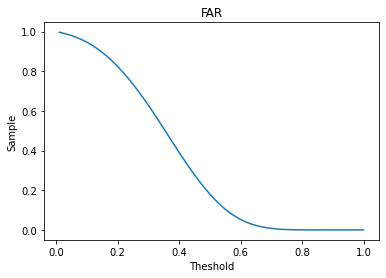

In [68]:
plt.plot(theshold_list, facenet_far) # plotting by columns
plt.title("FAR")
plt.xlabel('Theshold')
plt.ylabel('Sample')
plt.show()

#EER

In [69]:
import scipy.interpolate, scipy.optimize

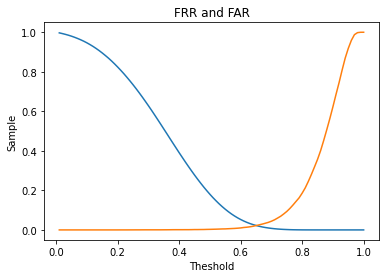

<Figure size 720x720 with 0 Axes>

In [70]:
plt.plot(theshold_list, facenet_far) 
plt.plot(theshold_list, facenet_frr)
plt.title("FRR and FAR")
plt.xlabel('Theshold')
plt.ylabel('Sample')


plt.figure(figsize=(10, 10))
plt.show()

In [71]:
from sklearn import metrics
from scipy.optimize import brentq
from scipy.interpolate import interp1d

def cal_eer(frr, far):
    fpr, tpr, thresholds = metrics.roc_curve([1] * len(frr) + [0] * len(far), frr + far, pos_label=1)

    thresh = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
    eer = interp1d(fpr, thresholds)(thresh)
    return eer, thresh

In [72]:
err, thr = cal_eer(facenet_frr, facenet_far)

In [73]:
print("EER = ",err)

EER =  0.02246712927518417


In [74]:
facenet_frr[75]

0.10853855328702729

In [75]:
facenet_far[75]

0.0012503678489214224

##Threshold

In [76]:
print("threshold = ", thr)

threshold =  0.6499999999999664


# แยกชายหญิง

In [ ]:
facenet_distance = pd.read_csv(path+'/facenet_distance.csv')

In [ ]:
facenet_distance

,image_name,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,m_11_10.jpg,m_11_12.jpg,m_11_16.jpg,m_11_15.jpg,m_11_14.jpg,m_11_13.jpg,m_11_17.jpg,m_10_3.jpg,m_10_1.jpg,m_10_2.jpg,m_10_4.jpg,m_10_6.jpg,m_10_5.jpg,m_10_8.jpg,m_10_9.jpg,m_10_7.jpg,m_10_13.jpg,m_10_14.jpg,m_10_12.jpg,m_10_10.jpg,m_10_11.jpg,m_10_16.jpg,m_10_15.jpg,m_10_17.jpg,m_14_1.jpg,m_14_4.jpg,m_14_2.jpg,m_14_3.jpg,m_14_6.jpg,...,w_8_12.jpg,w_8_14.jpg,w_8_15.jpg,w_8_13.jpg,w_8_16.jpg,w_8_17.jpg,w_6_1.jpg,w_6_2.jpg,w_6_5.jpg,w_6_3.jpg,w_6_4.jpg,w_6_6.jpg,w_6_7.jpg,w_6_8.jpg,w_6_11.jpg,w_6_9.jpg,w_6_10.jpg,w_6_12.jpg,w_6_13.jpg,w_6_14.jpg,w_6_16.jpg,w_6_15.jpg,w_6_17.jpg,w_51_1.jpg,w_51_3.jpg,w_51_2.jpg,w_51_5.jpg,w_51_4.jpg,w_51_8.jpg,w_51_6.jpg,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,m_11_1.jpg,1.000000,0.834057,0.877657,0.806896,0.608299,0.955451,0.938577,0.958371,0.926961,0.963159,0.955755,0.970310,0.891619,0.944433,0.910687,0.961989,0.959236,0.372930,0.369746,0.287761,0.260801,0.408950,0.301265,0.302077,0.375965,0.373530,0.422475,0.337454,0.366662,0.352687,0.383528,0.331829,0.361829,0.447012,0.747746,0.566829,0.671802,0.498396,0.760690,...,0.491928,0.364019,0.276396,0.397318,0.375487,0.246069,0.576901,0.404645,0.497497,0.563571,0.501133,0.554415,0.561064,0.518741,0.486605,0.555068,0.579086,0.551065,0.540923,0.532690,0.422129,0.618722,0.496023,0.164021,0.070563,0.267080,0.316210,0.347265,0.246824,0.270968,0.341851,0.190496,0.261781,0.228425,0.273005,0.171959,0.256462,0.285001,0.301717,0.200838
1,m_11_4.jpg,0.834057,1.000000,0.796967,0.926616,0.723877,0.842199,0.852137,0.870876,0.811191,0.863027,0.846614,0.853576,0.843564,0.837464,0.804676,0.802721,0.838734,0.467635,0.364460,0.370743,0.349641,0.392396,0.392138,0.309839,0.392605,0.354629,0.447763,0.336581,0.393090,0.365067,0.384550,0.316282,0.387990,0.432430,0.615525,0.560741,0.660340,0.490193,0.602077,...,0.502488,0.351919,0.227339,0.306379,0.311423,0.196480,0.423320,0.367075,0.517884,0.432561,0.440540,0.412879,0.383193,0.381973,0.348899,0.415039,0.412622,0.363470,0.364949,0.372791,0.286308,0.427151,0.367413,0.089410,-0.001106,0.269212,0.268721,0.324145,0.205883,0.177087,0.232559,0.126705,0.167603,0.135027,0.202186,0.124562,0.178227,0.202203,0.217537,0.120889
2,m_11_2.jpg,0.877657,0.796967,1.000000,0.759888,0.644897,0.840883,0.812561,0.852063,0.812154,0.866188,0.855712,0.879344,0.797941,0.872985,0.891937,0.849520,0.861201,0.454628,0.397711,0.311984,0.277741,0.433831,0.324285,0.344838,0.411114,0.405440,0.470885,0.365863,0.395865,0.410592,0.430102,0.354255,0.389633,0.469620,0.678691,0.592155,0.693307,0.580788,0.694959,...,0.459767,0.340303,0.315119,0.330313,0.364245,0.276326,0.477704,0.426963,0.400454,0.460668,0.477630,0.480529,0.527548,0.442193,0.403849,0.504323,0.512428,0.463301,0.453753,0.526849,0.379223,0.539676,0.420639,0.110840,0.064413,0.285202,0.233315,0.254305,0.172299,0.194996,0.253091,0.107108,0.237182,0.143237,0.192262,0.106257,0.193019,0.242747,0.224473,0.200131
3,m_11_5.jpg,0.806896,0.926616,0.759888,1.000000,0.799989,0.841760,0.847060,0.852658,0.838887,0.847500,0.864960,0.833935,0.869661,0.846169,0.780661,0.800330,0.812524,0.474547,0.331664,0.297340,0.325005,0.362410,0.362049,0.294876,0.355813,0.294352,0.371405,0.299878,0.367197,0.343626,0.371326,0.269674,0.331320,0.385735,0.548771,0.446900,0.534379,0.431813,0.526639,...,0.391104,0.322330,0.174282,0.241640,0.244375,0.120214,0.396321,0.333829,0.493388,0.383681,0.441734,0.365633,0.366754,0.370663,0.327336,0.396273,0.395584,0.355530,0.351575,0.361036,0.305910,0.406389,0.318411,0.061935,-0.035462,0.277083,0.165802,0.266173,0.165006,0.145847,0.180103,0.117637,0.118174,0.133128,0.169764,0.100642,0.150153,0.221730,0.184558,0.096794
4,m_11_3.jpg,0.608299,0.723877,0.644897,0.799989,1.000000,0.641877,0.659291,0.677060,0.689285,0.647308,0.667402,0.634674,0.731161,0.682142,0.723146,0.597527,0.610780,0.579384,0.359809,0.

In [ ]:
#column
col_name = list(facenet_distance)
col_name[1][:1]

'm'

In [ ]:
len(facenet_distance)

1800

In [ ]:
facenet_distance['image_name'][0][:1]

'm'

In [ ]:
len(col_name)

1801

## ทำให้เหลือแค่ผู้ชาย

In [ ]:
for j in range(len(col_name)):
  if col_name[j][:1] == "w":
    facenet_distance = facenet_distance.drop(col_name[j], 1)
      

In [ ]:
facenet_distance

,image_name,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,m_11_10.jpg,m_11_12.jpg,m_11_16.jpg,m_11_15.jpg,m_11_14.jpg,m_11_13.jpg,m_11_17.jpg,m_10_3.jpg,m_10_1.jpg,m_10_2.jpg,m_10_4.jpg,m_10_6.jpg,m_10_5.jpg,m_10_8.jpg,m_10_9.jpg,m_10_7.jpg,m_10_13.jpg,m_10_14.jpg,m_10_12.jpg,m_10_10.jpg,m_10_11.jpg,m_10_16.jpg,m_10_15.jpg,m_10_17.jpg,m_14_1.jpg,m_14_4.jpg,m_14_2.jpg,m_14_3.jpg,m_14_6.jpg,...,m_7_9.jpg,m_7_10.jpg,m_7_13.jpg,m_7_12.jpg,m_7_16.jpg,m_7_15.jpg,m_7_14.jpg,m_7_17.jpg,m_55_1.jpg,m_55_2.jpg,m_55_5.jpg,m_55_3.jpg,m_55_7.jpg,m_55_6.jpg,m_55_8.jpg,m_55_9.jpg,m_55_10.jpg,m_55_12.jpg,m_55_13.jpg,m_55_11.jpg,m_55_14.jpg,m_55_16.jpg,m_55_15.jpg,m_55_17.jpg,m_9_2.jpg,m_9_1.jpg,m_9_4.jpg,m_9_6.jpg,m_9_5.jpg,m_9_7.jpg,m_9_10.jpg,m_9_9.jpg,m_9_8.jpg,m_9_12.jpg,m_9_11.jpg,m_9_13.jpg,m_9_14.jpg,m_9_15.jpg,m_9_17.jpg,m_9_16.jpg
0,m_11_1.jpg,1.000000,0.834057,0.877657,0.806896,0.608299,0.955451,0.938577,0.958371,0.926961,0.963159,0.955755,0.970310,0.891619,0.944433,0.910687,0.961989,0.959236,0.372930,0.369746,0.287761,0.260801,0.408950,0.301265,0.302077,0.375965,0.373530,0.422475,0.337454,0.366662,0.352687,0.383528,0.331829,0.361829,0.447012,0.747746,0.566829,0.671802,0.498396,0.760690,...,0.465046,0.423405,0.422369,0.498855,0.528901,0.399952,0.446962,0.405846,0.680411,0.436120,0.632181,0.613134,0.719653,0.658713,0.623985,0.642357,0.628723,0.653029,0.680249,0.656534,0.764021,0.739809,0.585231,0.719045,0.435849,0.496563,0.444280,0.461041,0.392051,0.495726,0.517286,0.531720,0.525849,0.446066,0.514685,0.408190,0.601640,0.572430,0.431907,0.511843
1,m_11_4.jpg,0.834057,1.000000,0.796967,0.926616,0.723877,0.842199,0.852137,0.870876,0.811191,0.863027,0.846614,0.853576,0.843564,0.837464,0.804676,0.802721,0.838734,0.467635,0.364460,0.370743,0.349641,0.392396,0.392138,0.309839,0.392605,0.354629,0.447763,0.336581,0.393090,0.365067,0.384550,0.316282,0.387990,0.432430,0.615525,0.560741,0.660340,0.490193,0.602077,...,0.355043,0.368324,0.357654,0.435263,0.450694,0.277555,0.326379,0.302116,0.626078,0.424722,0.617293,0.559803,0.641137,0.522136,0.602106,0.577522,0.536351,0.606879,0.609314,0.634458,0.696418,0.676773,0.472267,0.596694,0.297103,0.327572,0.289854,0.256142,0.273959,0.317197,0.383022,0.336816,0.334758,0.309562,0.341872,0.246518,0.365890,0.372537,0.251110,0.312895
2,m_11_2.jpg,0.877657,0.796967,1.000000,0.759888,0.644897,0.840883,0.812561,0.852063,0.812154,0.866188,0.855712,0.879344,0.797941,0.872985,0.891937,0.849520,0.861201,0.454628,0.397711,0.311984,0.277741,0.433831,0.324285,0.344838,0.411114,0.405440,0.470885,0.365863,0.395865,0.410592,0.430102,0.354255,0.389633,0.469620,0.678691,0.592155,0.693307,0.580788,0.694959,...,0.376562,0.365982,0.331114,0.409684,0.425081,0.259082,0.329562,0.314370,0.590056,0.453904,0.551951,0.509665,0.636117,0.522426,0.527452,0.554021,0.532947,0.551540,0.565879,0.565535,0.676769,0.689169,0.515529,0.618414,0.420104,0.442749,0.406943,0.414538,0.339043,0.414112,0.509441,0.472815,0.481199,0.430263,0.478426,0.373956,0.574357,0.550491,0.415441,0.477255
3,m_11_5.jpg,0.806896,0.926616,0.759888,1.000000,0.799989,0.841760,0.847060,0.852658,0.838887,0.847500,0.864960,0.833935,0.869661,0.846169,0.780661,0.800330,0.812524,0.474547,0.331664,0.297340,0.325005,0.362410,0.362049,0.294876,0.355813,0.294352,0.371405,0.299878,0.367197,0.343626,0.371326,0.269674,0.331320,0.385735,0.548771,0.446900,0.534379,0.431813,0.526639,...,0.320430,0.311263,0.295216,0.402614,0.404726,0.229080,0.269686,0.287100,0.554418,0.296587,0.552089,0.513470,0.532076,0.455624,0.523610,0.484343,0.498298,0.536446,0.523514,0.561147,0.622340,0.557775,0.377180,0.515850,0.215710,0.264105,0.242226,0.193382,0.274203,0.272602,0.290416,0.272913,0.268474,0.233781,0.254805,0.183546,0.306670,0.319783,0.213711,0.256508
4,m_11_3.jpg,0.608299,0.723877,0.644897,0.799989,1.000000,0.641877,0.659291,0.677060,0.689285,0.647308,0.667402,0.634674,0.731161,0.682142,0.723146,0.597527,0.610780,0.579384,0.359809,0.33

In [ ]:
for i in range(len(facenet_distance)):
  if facenet_distance['image_name'][i][:1] == "w":
    facenet_distance = facenet_distance.drop(i)

In [ ]:
facenet_distance

,image_name,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,m_11_10.jpg,m_11_12.jpg,m_11_16.jpg,m_11_15.jpg,m_11_14.jpg,m_11_13.jpg,m_11_17.jpg,m_10_3.jpg,m_10_1.jpg,m_10_2.jpg,m_10_4.jpg,m_10_6.jpg,m_10_5.jpg,m_10_8.jpg,m_10_9.jpg,m_10_7.jpg,m_10_13.jpg,m_10_14.jpg,m_10_12.jpg,m_10_10.jpg,m_10_11.jpg,m_10_16.jpg,m_10_15.jpg,m_10_17.jpg,m_14_1.jpg,m_14_4.jpg,m_14_2.jpg,m_14_3.jpg,m_14_6.jpg,...,m_7_9.jpg,m_7_10.jpg,m_7_13.jpg,m_7_12.jpg,m_7_16.jpg,m_7_15.jpg,m_7_14.jpg,m_7_17.jpg,m_55_1.jpg,m_55_2.jpg,m_55_5.jpg,m_55_3.jpg,m_55_7.jpg,m_55_6.jpg,m_55_8.jpg,m_55_9.jpg,m_55_10.jpg,m_55_12.jpg,m_55_13.jpg,m_55_11.jpg,m_55_14.jpg,m_55_16.jpg,m_55_15.jpg,m_55_17.jpg,m_9_2.jpg,m_9_1.jpg,m_9_4.jpg,m_9_6.jpg,m_9_5.jpg,m_9_7.jpg,m_9_10.jpg,m_9_9.jpg,m_9_8.jpg,m_9_12.jpg,m_9_11.jpg,m_9_13.jpg,m_9_14.jpg,m_9_15.jpg,m_9_17.jpg,m_9_16.jpg
0,m_11_1.jpg,1.000000,0.834057,0.877657,0.806896,0.608299,0.955451,0.938577,0.958371,0.926961,0.963159,0.955755,0.970310,0.891619,0.944433,0.910687,0.961989,0.959236,0.372930,0.369746,0.287761,0.260801,0.408950,0.301265,0.302077,0.375965,0.373530,0.422475,0.337454,0.366662,0.352687,0.383528,0.331829,0.361829,0.447012,0.747746,0.566829,0.671802,0.498396,0.760690,...,0.465046,0.423405,0.422369,0.498855,0.528901,0.399952,0.446962,0.405846,0.680411,0.436120,0.632181,0.613134,0.719653,0.658713,0.623985,0.642357,0.628723,0.653029,0.680249,0.656534,0.764021,0.739809,0.585231,0.719045,0.435849,0.496563,0.444280,0.461041,0.392051,0.495726,0.517286,0.531720,0.525849,0.446066,0.514685,0.408190,0.601640,0.572430,0.431907,0.511843
1,m_11_4.jpg,0.834057,1.000000,0.796967,0.926616,0.723877,0.842199,0.852137,0.870876,0.811191,0.863027,0.846614,0.853576,0.843564,0.837464,0.804676,0.802721,0.838734,0.467635,0.364460,0.370743,0.349641,0.392396,0.392138,0.309839,0.392605,0.354629,0.447763,0.336581,0.393090,0.365067,0.384550,0.316282,0.387990,0.432430,0.615525,0.560741,0.660340,0.490193,0.602077,...,0.355043,0.368324,0.357654,0.435263,0.450694,0.277555,0.326379,0.302116,0.626078,0.424722,0.617293,0.559803,0.641137,0.522136,0.602106,0.577522,0.536351,0.606879,0.609314,0.634458,0.696418,0.676773,0.472267,0.596694,0.297103,0.327572,0.289854,0.256142,0.273959,0.317197,0.383022,0.336816,0.334758,0.309562,0.341872,0.246518,0.365890,0.372537,0.251110,0.312895
2,m_11_2.jpg,0.877657,0.796967,1.000000,0.759888,0.644897,0.840883,0.812561,0.852063,0.812154,0.866188,0.855712,0.879344,0.797941,0.872985,0.891937,0.849520,0.861201,0.454628,0.397711,0.311984,0.277741,0.433831,0.324285,0.344838,0.411114,0.405440,0.470885,0.365863,0.395865,0.410592,0.430102,0.354255,0.389633,0.469620,0.678691,0.592155,0.693307,0.580788,0.694959,...,0.376562,0.365982,0.331114,0.409684,0.425081,0.259082,0.329562,0.314370,0.590056,0.453904,0.551951,0.509665,0.636117,0.522426,0.527452,0.554021,0.532947,0.551540,0.565879,0.565535,0.676769,0.689169,0.515529,0.618414,0.420104,0.442749,0.406943,0.414538,0.339043,0.414112,0.509441,0.472815,0.481199,0.430263,0.478426,0.373956,0.574357,0.550491,0.415441,0.477255
3,m_11_5.jpg,0.806896,0.926616,0.759888,1.000000,0.799989,0.841760,0.847060,0.852658,0.838887,0.847500,0.864960,0.833935,0.869661,0.846169,0.780661,0.800330,0.812524,0.474547,0.331664,0.297340,0.325005,0.362410,0.362049,0.294876,0.355813,0.294352,0.371405,0.299878,0.367197,0.343626,0.371326,0.269674,0.331320,0.385735,0.548771,0.446900,0.534379,0.431813,0.526639,...,0.320430,0.311263,0.295216,0.402614,0.404726,0.229080,0.269686,0.287100,0.554418,0.296587,0.552089,0.513470,0.532076,0.455624,0.523610,0.484343,0.498298,0.536446,0.523514,0.561147,0.622340,0.557775,0.377180,0.515850,0.215710,0.264105,0.242226,0.193382,0.274203,0.272602,0.290416,0.272913,0.268474,0.233781,0.254805,0.183546,0.306670,0.319783,0.213711,0.256508
4,m_11_3.jpg,0.608299,0.723877,0.644897,0.799989,1.000000,0.641877,0.659291,0.677060,0.689285,0.647308,0.667402,0.634674,0.731161,0.682142,0.723146,0.597527,0.610780,0.579384,0.359809,0.33

In [ ]:
facenet_distance.to_csv('facenet_distance_male.csv', index=False)

## ทำให้เหลือแค่ผู้หญิง

In [ ]:
facenet_distance = pd.read_csv(path+'/facenet_distance.csv')

In [ ]:
facenet_distance

,image_name,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,m_11_10.jpg,m_11_12.jpg,m_11_16.jpg,m_11_15.jpg,m_11_14.jpg,m_11_13.jpg,m_11_17.jpg,m_10_3.jpg,m_10_1.jpg,m_10_2.jpg,m_10_4.jpg,m_10_6.jpg,m_10_5.jpg,m_10_8.jpg,m_10_9.jpg,m_10_7.jpg,m_10_13.jpg,m_10_14.jpg,m_10_12.jpg,m_10_10.jpg,m_10_11.jpg,m_10_16.jpg,m_10_15.jpg,m_10_17.jpg,m_14_1.jpg,m_14_4.jpg,m_14_2.jpg,m_14_3.jpg,m_14_6.jpg,...,w_8_12.jpg,w_8_14.jpg,w_8_15.jpg,w_8_13.jpg,w_8_16.jpg,w_8_17.jpg,w_6_1.jpg,w_6_2.jpg,w_6_5.jpg,w_6_3.jpg,w_6_4.jpg,w_6_6.jpg,w_6_7.jpg,w_6_8.jpg,w_6_11.jpg,w_6_9.jpg,w_6_10.jpg,w_6_12.jpg,w_6_13.jpg,w_6_14.jpg,w_6_16.jpg,w_6_15.jpg,w_6_17.jpg,w_51_1.jpg,w_51_3.jpg,w_51_2.jpg,w_51_5.jpg,w_51_4.jpg,w_51_8.jpg,w_51_6.jpg,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,m_11_1.jpg,1.000000,0.834057,0.877657,0.806896,0.608299,0.955451,0.938577,0.958371,0.926961,0.963159,0.955755,0.970310,0.891619,0.944433,0.910687,0.961989,0.959236,0.372930,0.369746,0.287761,0.260801,0.408950,0.301265,0.302077,0.375965,0.373530,0.422475,0.337454,0.366662,0.352687,0.383528,0.331829,0.361829,0.447012,0.747746,0.566829,0.671802,0.498396,0.760690,...,0.491928,0.364019,0.276396,0.397318,0.375487,0.246069,0.576901,0.404645,0.497497,0.563571,0.501133,0.554415,0.561064,0.518741,0.486605,0.555068,0.579086,0.551065,0.540923,0.532690,0.422129,0.618722,0.496023,0.164021,0.070563,0.267080,0.316210,0.347265,0.246824,0.270968,0.341851,0.190496,0.261781,0.228425,0.273005,0.171959,0.256462,0.285001,0.301717,0.200838
1,m_11_4.jpg,0.834057,1.000000,0.796967,0.926616,0.723877,0.842199,0.852137,0.870876,0.811191,0.863027,0.846614,0.853576,0.843564,0.837464,0.804676,0.802721,0.838734,0.467635,0.364460,0.370743,0.349641,0.392396,0.392138,0.309839,0.392605,0.354629,0.447763,0.336581,0.393090,0.365067,0.384550,0.316282,0.387990,0.432430,0.615525,0.560741,0.660340,0.490193,0.602077,...,0.502488,0.351919,0.227339,0.306379,0.311423,0.196480,0.423320,0.367075,0.517884,0.432561,0.440540,0.412879,0.383193,0.381973,0.348899,0.415039,0.412622,0.363470,0.364949,0.372791,0.286308,0.427151,0.367413,0.089410,-0.001106,0.269212,0.268721,0.324145,0.205883,0.177087,0.232559,0.126705,0.167603,0.135027,0.202186,0.124562,0.178227,0.202203,0.217537,0.120889
2,m_11_2.jpg,0.877657,0.796967,1.000000,0.759888,0.644897,0.840883,0.812561,0.852063,0.812154,0.866188,0.855712,0.879344,0.797941,0.872985,0.891937,0.849520,0.861201,0.454628,0.397711,0.311984,0.277741,0.433831,0.324285,0.344838,0.411114,0.405440,0.470885,0.365863,0.395865,0.410592,0.430102,0.354255,0.389633,0.469620,0.678691,0.592155,0.693307,0.580788,0.694959,...,0.459767,0.340303,0.315119,0.330313,0.364245,0.276326,0.477704,0.426963,0.400454,0.460668,0.477630,0.480529,0.527548,0.442193,0.403849,0.504323,0.512428,0.463301,0.453753,0.526849,0.379223,0.539676,0.420639,0.110840,0.064413,0.285202,0.233315,0.254305,0.172299,0.194996,0.253091,0.107108,0.237182,0.143237,0.192262,0.106257,0.193019,0.242747,0.224473,0.200131
3,m_11_5.jpg,0.806896,0.926616,0.759888,1.000000,0.799989,0.841760,0.847060,0.852658,0.838887,0.847500,0.864960,0.833935,0.869661,0.846169,0.780661,0.800330,0.812524,0.474547,0.331664,0.297340,0.325005,0.362410,0.362049,0.294876,0.355813,0.294352,0.371405,0.299878,0.367197,0.343626,0.371326,0.269674,0.331320,0.385735,0.548771,0.446900,0.534379,0.431813,0.526639,...,0.391104,0.322330,0.174282,0.241640,0.244375,0.120214,0.396321,0.333829,0.493388,0.383681,0.441734,0.365633,0.366754,0.370663,0.327336,0.396273,0.395584,0.355530,0.351575,0.361036,0.305910,0.406389,0.318411,0.061935,-0.035462,0.277083,0.165802,0.266173,0.165006,0.145847,0.180103,0.117637,0.118174,0.133128,0.169764,0.100642,0.150153,0.221730,0.184558,0.096794
4,m_11_3.jpg,0.608299,0.723877,0.644897,0.799989,1.000000,0.641877,0.659291,0.677060,0.689285,0.647308,0.667402,0.634674,0.731161,0.682142,0.723146,0.597527,0.610780,0.579384,0.359809,0.

In [ ]:
#column
col_name = list(facenet_distance)
col_name[1][:1]

'm'

In [ ]:
for j in range(len(col_name)):
  if col_name[j][:1] == "m":
    facenet_distance = facenet_distance.drop(col_name[j], 1)

In [ ]:
facenet_distance

,image_name,w_12_1.jpg,w_12_2.jpg,w_12_7.jpg,w_12_6.jpg,w_12_5.jpg,w_12_8.jpg,w_12_10.jpg,w_12_9.jpg,w_12_11.jpg,w_12_12.jpg,w_12_13.jpg,w_12_14.jpg,w_12_15.jpg,w_12_16.jpg,w_12_17.jpg,w_10_2.jpg,w_10_3.jpg,w_10_1.jpg,w_10_5.jpg,w_10_4.jpg,w_10_6.jpg,w_10_7.jpg,w_10_8.jpg,w_10_11.jpg,w_10_10.jpg,w_10_9.jpg,w_10_14.jpg,w_10_12.jpg,w_10_13.jpg,w_10_15.jpg,w_10_16.jpg,w_10_17.jpg,w_1_1.jpg,w_1_2.jpg,w_1_4.jpg,w_1_3.jpg,w_1_6.jpg,w_1_7.jpg,w_1_5.jpg,...,w_8_12.jpg,w_8_14.jpg,w_8_15.jpg,w_8_13.jpg,w_8_16.jpg,w_8_17.jpg,w_6_1.jpg,w_6_2.jpg,w_6_5.jpg,w_6_3.jpg,w_6_4.jpg,w_6_6.jpg,w_6_7.jpg,w_6_8.jpg,w_6_11.jpg,w_6_9.jpg,w_6_10.jpg,w_6_12.jpg,w_6_13.jpg,w_6_14.jpg,w_6_16.jpg,w_6_15.jpg,w_6_17.jpg,w_51_1.jpg,w_51_3.jpg,w_51_2.jpg,w_51_5.jpg,w_51_4.jpg,w_51_8.jpg,w_51_6.jpg,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,m_11_1.jpg,0.217966,0.117869,0.268684,0.205278,0.221311,0.181021,0.148447,0.175692,0.139521,0.194533,0.184187,0.296038,0.222705,0.107654,0.246923,0.297076,0.212919,0.227484,0.268909,0.243331,0.240869,0.187715,0.180094,0.199654,0.255888,0.233749,0.233685,0.134407,0.160833,0.218320,0.176978,0.169739,0.362594,0.371925,0.238245,0.283054,0.317042,0.289761,0.299267,...,0.491928,0.364019,0.276396,0.397318,0.375487,0.246069,0.576901,0.404645,0.497497,0.563571,0.501133,0.554415,0.561064,0.518741,0.486605,0.555068,0.579086,0.551065,0.540923,0.532690,0.422129,0.618722,0.496023,0.164021,0.070563,0.267080,0.316210,0.347265,0.246824,0.270968,0.341851,0.190496,0.261781,0.228425,0.273005,0.171959,0.256462,0.285001,0.301717,0.200838
1,m_11_4.jpg,0.246804,0.085286,0.318775,0.228322,0.304063,0.204367,0.160453,0.216450,0.153020,0.212324,0.231119,0.330519,0.210637,0.186970,0.236632,0.083951,0.008824,0.022165,0.089526,0.057063,0.025793,0.002389,-0.050007,-0.020732,0.047940,0.030397,0.040243,-0.069707,-0.016080,0.020324,-0.041546,-0.046107,0.363548,0.442550,0.360409,0.394240,0.280309,0.331437,0.429111,...,0.502488,0.351919,0.227339,0.306379,0.311423,0.196480,0.423320,0.367075,0.517884,0.432561,0.440540,0.412879,0.383193,0.381973,0.348899,0.415039,0.412622,0.363470,0.364949,0.372791,0.286308,0.427151,0.367413,0.089410,-0.001106,0.269212,0.268721,0.324145,0.205883,0.177087,0.232559,0.126705,0.167603,0.135027,0.202186,0.124562,0.178227,0.202203,0.217537,0.120889
2,m_11_2.jpg,0.179349,0.087835,0.268369,0.199496,0.193666,0.162051,0.105711,0.158543,0.118676,0.134064,0.135230,0.311530,0.235720,0.128779,0.204327,0.192607,0.143194,0.151078,0.181180,0.200187,0.169354,0.125671,0.107027,0.146771,0.187539,0.147593,0.138500,0.067338,0.086221,0.153858,0.099337,0.104567,0.318549,0.383546,0.223776,0.333409,0.299447,0.225859,0.278627,...,0.459767,0.340303,0.315119,0.330313,0.364245,0.276326,0.477704,0.426963,0.400454,0.460668,0.477630,0.480529,0.527548,0.442193,0.403849,0.504323,0.512428,0.463301,0.453753,0.526849,0.379223,0.539676,0.420639,0.110840,0.064413,0.285202,0.233315,0.254305,0.172299,0.194996,0.253091,0.107108,0.237182,0.143237,0.192262,0.106257,0.193019,0.242747,0.224473,0.200131
3,m_11_5.jpg,0.207859,0.068818,0.261352,0.194100,0.240846,0.165327,0.135749,0.135149,0.116979,0.197475,0.198190,0.327680,0.209763,0.187676,0.199838,0.182703,0.113610,0.115344,0.167013,0.090806,0.109414,0.095813,0.051335,0.082397,0.142342,0.112288,0.111419,0.026954,0.066047,0.117634,0.042571,0.071005,0.280841,0.377837,0.308196,0.431899,0.214867,0.299750,0.367666,...,0.391104,0.322330,0.174282,0.241640,0.244375,0.120214,0.396321,0.333829,0.493388,0.383681,0.441734,0.365633,0.366754,0.370663,0.327336,0.396273,0.395584,0.355530,0.351575,0.361036,0.305910,0.406389,0.318411,0.061935,-0.035462,0.277083,0.165802,0.266173,0.165006,0.145847,0.180103,0.117637,0.118174,0.133128,0.169764,0.100642,0.150153,0.221730,0.184558,0.096794
4,m_11_3.jpg,0.211443,0.137769,0.276506,0.196121,0.262556,0.179532,0.157656,0.157059,0.146014,0.159823,0.183353,0.336482,0.256734,0.284371,0.170321,0.094414,0.117176,0.132402,0.105374,0.0

In [ ]:
for i in range(len(facenet_distance)):
  if facenet_distance['image_name'][i][:1] == "m":
    facenet_distance = facenet_distance.drop(i)

In [ ]:
facenet_distance

,image_name,w_12_1.jpg,w_12_2.jpg,w_12_7.jpg,w_12_6.jpg,w_12_5.jpg,w_12_8.jpg,w_12_10.jpg,w_12_9.jpg,w_12_11.jpg,w_12_12.jpg,w_12_13.jpg,w_12_14.jpg,w_12_15.jpg,w_12_16.jpg,w_12_17.jpg,w_10_2.jpg,w_10_3.jpg,w_10_1.jpg,w_10_5.jpg,w_10_4.jpg,w_10_6.jpg,w_10_7.jpg,w_10_8.jpg,w_10_11.jpg,w_10_10.jpg,w_10_9.jpg,w_10_14.jpg,w_10_12.jpg,w_10_13.jpg,w_10_15.jpg,w_10_16.jpg,w_10_17.jpg,w_1_1.jpg,w_1_2.jpg,w_1_4.jpg,w_1_3.jpg,w_1_6.jpg,w_1_7.jpg,w_1_5.jpg,...,w_8_12.jpg,w_8_14.jpg,w_8_15.jpg,w_8_13.jpg,w_8_16.jpg,w_8_17.jpg,w_6_1.jpg,w_6_2.jpg,w_6_5.jpg,w_6_3.jpg,w_6_4.jpg,w_6_6.jpg,w_6_7.jpg,w_6_8.jpg,w_6_11.jpg,w_6_9.jpg,w_6_10.jpg,w_6_12.jpg,w_6_13.jpg,w_6_14.jpg,w_6_16.jpg,w_6_15.jpg,w_6_17.jpg,w_51_1.jpg,w_51_3.jpg,w_51_2.jpg,w_51_5.jpg,w_51_4.jpg,w_51_8.jpg,w_51_6.jpg,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
857,w_12_1.jpg,1.000000,0.773064,0.928907,0.930662,0.855395,0.939893,0.930442,0.939691,0.907340,0.954650,0.932329,0.885516,0.925101,0.641505,0.914035,0.265735,0.327413,0.383023,0.332391,0.426455,0.324173,0.343193,0.283410,0.286908,0.321548,0.316313,0.305494,0.311135,0.328250,0.329708,0.291288,0.282196,0.672224,0.554985,0.689276,0.302619,0.727164,0.677069,0.677079,...,0.415720,0.384291,0.432727,0.416406,0.385183,0.406055,0.529777,0.409948,0.457479,0.487911,0.487257,0.478346,0.440141,0.456375,0.526680,0.401683,0.376089,0.536379,0.536961,0.503444,0.556673,0.428461,0.515146,0.394437,0.271917,0.393155,0.476728,0.448644,0.369328,0.380058,0.283236,0.365797,0.363435,0.351749,0.264496,0.347784,0.370428,0.305848,0.455468,0.352132
858,w_12_2.jpg,0.773064,1.000000,0.689904,0.788586,0.667264,0.740443,0.753702,0.731927,0.808607,0.731465,0.729672,0.687189,0.785421,0.600151,0.797359,0.257192,0.309783,0.362418,0.329387,0.426648,0.321196,0.371406,0.356650,0.304431,0.318884,0.317261,0.298587,0.340211,0.348798,0.363121,0.323132,0.298491,0.503016,0.407039,0.484360,0.303923,0.507577,0.499494,0.480428,...,0.358058,0.245932,0.393124,0.416968,0.262372,0.389942,0.410078,0.399555,0.320330,0.381748,0.475758,0.369702,0.407644,0.396173,0.433772,0.311021,0.298186,0.423441,0.449514,0.406374,0.506118,0.314564,0.390203,0.325746,0.394311,0.388852,0.453680,0.392003,0.324857,0.350953,0.209417,0.314834,0.313187,0.356246,0.255212,0.318852,0.365862,0.189812,0.426703,0.331210
859,w_12_7.jpg,0.928907,0.689904,1.000000,0.923867,0.888305,0.927251,0.882987,0.921586,0.883788,0.909325,0.912812,0.844805,0.910032,0.551630,0.920288,0.181580,0.247129,0.308438,0.261734,0.370689,0.240474,0.271580,0.189961,0.199095,0.240052,0.243187,0.246687,0.232149,0.250600,0.266132,0.205324,0.204767,0.695013,0.481769,0.656059,0.282316,0.731282,0.647857,0.644186,...,0.440445,0.405232,0.481656,0.414952,0.374477,0.398785,0.452990,0.341373,0.410647,0.391003,0.424367,0.407701,0.351816,0.397727,0.425657,0.336091,0.286933,0.452173,0.463577,0.434852,0.474140,0.364851,0.470889,0.427257,0.291059,0.449567,0.504598,0.495362,0.422895,0.399578,0.342018,0.355738,0.418428,0.358231,0.308645,0.376276,0.406034,0.370260,0.453142,0.431852
860,w_12_6.jpg,0.930662,0.788586,0.923867,1.000000,0.847944,0.932022,0.847509,0.877666,0.881504,0.904756,0.906793,0.861079,0.917548,0.655389,0.929564,0.267075,0.346324,0.402956,0.341218,0.455262,0.338512,0.371665,0.302866,0.303784,0.327218,0.325057,0.312793,0.339976,0.348931,0.365999,0.304024,0.315759,0.700559,0.484642,0.654946,0.301689,0.755798,0.671486,0.654452,...,0.466262,0.421616,0.505522,0.501615,0.400131,0.471845,0.479987,0.398649,0.450017,0.439006,0.457101,0.437946,0.394247,0.414625,0.483252,0.330609,0.303894,0.487174,0.489380,0.470420,0.560857,0.369532,0.509721,0.493777,0.361333,0.477102,0.596588,0.528374,0.461759,0.458414,0.363546,0.412132,0.451236,0.428415,0.359961,0.422323,0.455428,0.398040,0.517668,0.456982
861,w_12_5.jpg,0.855395,0.667264,0.888305,0.847944,1.000000,0.906825,0.898656,0.894330,0.870742,0.878726,0.873530,0.788926,0.857053,0.551992,0.860641,0.228997,0.227742,0.280171,0.273860,0

In [ ]:
facenet_distance.to_csv('facenet_distance_female.csv', index=False)

## masking

In [ ]:
facenet_male_masking = pd.read_csv(path+'/facenet_masking_male.csv')
facenet_female_masking = pd.read_csv(path+'/facenet_masking_female.csv')

### ชาย

In [ ]:
facenet_male_masking

,image_name,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,m_11_10.jpg,m_11_12.jpg,m_11_16.jpg,m_11_15.jpg,m_11_14.jpg,m_11_13.jpg,m_11_17.jpg,m_10_3.jpg,m_10_1.jpg,m_10_2.jpg,m_10_4.jpg,m_10_6.jpg,m_10_5.jpg,m_10_8.jpg,m_10_9.jpg,m_10_7.jpg,m_10_13.jpg,m_10_14.jpg,m_10_12.jpg,m_10_10.jpg,m_10_11.jpg,m_10_16.jpg,m_10_15.jpg,m_10_17.jpg,m_14_1.jpg,m_14_4.jpg,m_14_2.jpg,m_14_3.jpg,m_14_6.jpg,...,m_7_9.jpg,m_7_10.jpg,m_7_13.jpg,m_7_12.jpg,m_7_16.jpg,m_7_15.jpg,m_7_14.jpg,m_7_17.jpg,m_55_1.jpg,m_55_2.jpg,m_55_5.jpg,m_55_3.jpg,m_55_7.jpg,m_55_6.jpg,m_55_8.jpg,m_55_9.jpg,m_55_10.jpg,m_55_12.jpg,m_55_13.jpg,m_55_11.jpg,m_55_14.jpg,m_55_16.jpg,m_55_15.jpg,m_55_17.jpg,m_9_2.jpg,m_9_1.jpg,m_9_4.jpg,m_9_6.jpg,m_9_5.jpg,m_9_7.jpg,m_9_10.jpg,m_9_9.jpg,m_9_8.jpg,m_9_12.jpg,m_9_11.jpg,m_9_13.jpg,m_9_14.jpg,m_9_15.jpg,m_9_17.jpg,m_9_16.jpg
0,m_11_1.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,m_11_4.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,m_11_2.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,m_11_5.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,m_11_3.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,m_9_13.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
936,m_9_14.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
937,m_9_15.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
938,m_9_17.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#column
male_col_name = list(facenet_male_masking)
male_col_name[1][:4]

'm_11'

In [ ]:
for i in range(len(facenet_male_masking)):
  for j in range(len(male_col_name)):
    if facenet_male_masking['image_name'][i][:4] == male_col_name[j][:4]:
      facenet_male_masking.iloc[[i],[j]] = 1 #คนเดียวกัน
      if facenet_male_masking['image_name'][i] == male_col_name[j]:
        facenet_male_masking.iloc[[i],[j]] = np.nan #รูปเดียวกัน

In [ ]:
facenet_male_masking

,image_name,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,m_11_10.jpg,m_11_12.jpg,m_11_16.jpg,m_11_15.jpg,m_11_14.jpg,m_11_13.jpg,m_11_17.jpg,m_10_3.jpg,m_10_1.jpg,m_10_2.jpg,m_10_4.jpg,m_10_6.jpg,m_10_5.jpg,m_10_8.jpg,m_10_9.jpg,m_10_7.jpg,m_10_13.jpg,m_10_14.jpg,m_10_12.jpg,m_10_10.jpg,m_10_11.jpg,m_10_16.jpg,m_10_15.jpg,m_10_17.jpg,m_14_1.jpg,m_14_4.jpg,m_14_2.jpg,m_14_3.jpg,m_14_6.jpg,...,m_7_9.jpg,m_7_10.jpg,m_7_13.jpg,m_7_12.jpg,m_7_16.jpg,m_7_15.jpg,m_7_14.jpg,m_7_17.jpg,m_55_1.jpg,m_55_2.jpg,m_55_5.jpg,m_55_3.jpg,m_55_7.jpg,m_55_6.jpg,m_55_8.jpg,m_55_9.jpg,m_55_10.jpg,m_55_12.jpg,m_55_13.jpg,m_55_11.jpg,m_55_14.jpg,m_55_16.jpg,m_55_15.jpg,m_55_17.jpg,m_9_2.jpg,m_9_1.jpg,m_9_4.jpg,m_9_6.jpg,m_9_5.jpg,m_9_7.jpg,m_9_10.jpg,m_9_9.jpg,m_9_8.jpg,m_9_12.jpg,m_9_11.jpg,m_9_13.jpg,m_9_14.jpg,m_9_15.jpg,m_9_17.jpg,m_9_16.jpg
0,m_11_1.jpg,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,m_11_4.jpg,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,m_11_2.jpg,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,m_11_5.jpg,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,m_11_3.jpg,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,m_9_13.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
936,m_9_14.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0
937,m_9_15.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
938,m_9_17.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

### หญิง

In [ ]:
facenet_female_masking

,image_name,w_12_1.jpg,w_12_2.jpg,w_12_7.jpg,w_12_6.jpg,w_12_5.jpg,w_12_8.jpg,w_12_10.jpg,w_12_9.jpg,w_12_11.jpg,w_12_12.jpg,w_12_13.jpg,w_12_14.jpg,w_12_15.jpg,w_12_16.jpg,w_12_17.jpg,w_10_2.jpg,w_10_3.jpg,w_10_1.jpg,w_10_5.jpg,w_10_4.jpg,w_10_6.jpg,w_10_7.jpg,w_10_8.jpg,w_10_11.jpg,w_10_10.jpg,w_10_9.jpg,w_10_14.jpg,w_10_12.jpg,w_10_13.jpg,w_10_15.jpg,w_10_16.jpg,w_10_17.jpg,w_1_1.jpg,w_1_2.jpg,w_1_4.jpg,w_1_3.jpg,w_1_6.jpg,w_1_7.jpg,w_1_5.jpg,...,w_8_12.jpg,w_8_14.jpg,w_8_15.jpg,w_8_13.jpg,w_8_16.jpg,w_8_17.jpg,w_6_1.jpg,w_6_2.jpg,w_6_5.jpg,w_6_3.jpg,w_6_4.jpg,w_6_6.jpg,w_6_7.jpg,w_6_8.jpg,w_6_11.jpg,w_6_9.jpg,w_6_10.jpg,w_6_12.jpg,w_6_13.jpg,w_6_14.jpg,w_6_16.jpg,w_6_15.jpg,w_6_17.jpg,w_51_1.jpg,w_51_3.jpg,w_51_2.jpg,w_51_5.jpg,w_51_4.jpg,w_51_8.jpg,w_51_6.jpg,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,w_12_1.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,w_12_2.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,w_12_7.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,w_12_6.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,w_12_5.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,w_51_12.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
856,w_51_15.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
857,w_51_14.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
858,w_51_16.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#column
female_col_name = list(facenet_female_masking)
female_col_name[1][:4]

'w_12'

In [ ]:
for i in range(len(facenet_female_masking)):
  for j in range(len(female_col_name)):
    if facenet_female_masking['image_name'][i][:4] == female_col_name[j][:4]:
      facenet_female_masking.iloc[[i],[j]] = 1 #คนเดียวกัน
      if facenet_female_masking['image_name'][i] == female_col_name[j]:
        facenet_female_masking.iloc[[i],[j]] = np.nan #รูปเดียวกัน

In [ ]:
facenet_female_masking

,image_name,w_12_1.jpg,w_12_2.jpg,w_12_7.jpg,w_12_6.jpg,w_12_5.jpg,w_12_8.jpg,w_12_10.jpg,w_12_9.jpg,w_12_11.jpg,w_12_12.jpg,w_12_13.jpg,w_12_14.jpg,w_12_15.jpg,w_12_16.jpg,w_12_17.jpg,w_10_2.jpg,w_10_3.jpg,w_10_1.jpg,w_10_5.jpg,w_10_4.jpg,w_10_6.jpg,w_10_7.jpg,w_10_8.jpg,w_10_11.jpg,w_10_10.jpg,w_10_9.jpg,w_10_14.jpg,w_10_12.jpg,w_10_13.jpg,w_10_15.jpg,w_10_16.jpg,w_10_17.jpg,w_1_1.jpg,w_1_2.jpg,w_1_4.jpg,w_1_3.jpg,w_1_6.jpg,w_1_7.jpg,w_1_5.jpg,...,w_8_12.jpg,w_8_14.jpg,w_8_15.jpg,w_8_13.jpg,w_8_16.jpg,w_8_17.jpg,w_6_1.jpg,w_6_2.jpg,w_6_5.jpg,w_6_3.jpg,w_6_4.jpg,w_6_6.jpg,w_6_7.jpg,w_6_8.jpg,w_6_11.jpg,w_6_9.jpg,w_6_10.jpg,w_6_12.jpg,w_6_13.jpg,w_6_14.jpg,w_6_16.jpg,w_6_15.jpg,w_6_17.jpg,w_51_1.jpg,w_51_3.jpg,w_51_2.jpg,w_51_5.jpg,w_51_4.jpg,w_51_8.jpg,w_51_6.jpg,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,w_12_1.jpg,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,w_12_2.jpg,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,w_12_7.jpg,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,w_12_6.jpg,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,w_12_5.jpg,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,w_51_12.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
856,w_51_15.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0
857,w_51_14.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
858,w_51_16.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
facenet_male_masking.to_csv('facenet_male_masking_complete.csv', index=False)
facenet_female_masking.to_csv('facenet_female_masking_complete.csv', index=False)

## FRR

In [ ]:
#โหลดข้อมูล Distance จากไฟล์ CSV
facenet_male_distance = pd.read_csv(path+'/facenet_distance_male.csv')
facenet_female_distance = pd.read_csv(path+'/facenet_distance_female.csv')

In [ ]:
#โหลดข้อมูล Masking จากไฟล์ CSV
facenet_male_masking = pd.read_csv(path+'/facenet_male_masking_complete.csv')
facenet_female_masking = pd.read_csv(path+'/facenet_female_masking_complete.csv')

In [ ]:
facenet_male_distance

,image_name,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,m_11_10.jpg,m_11_12.jpg,m_11_16.jpg,m_11_15.jpg,m_11_14.jpg,m_11_13.jpg,m_11_17.jpg,m_10_3.jpg,m_10_1.jpg,m_10_2.jpg,m_10_4.jpg,m_10_6.jpg,m_10_5.jpg,m_10_8.jpg,m_10_9.jpg,m_10_7.jpg,m_10_13.jpg,m_10_14.jpg,m_10_12.jpg,m_10_10.jpg,m_10_11.jpg,m_10_16.jpg,m_10_15.jpg,m_10_17.jpg,m_14_1.jpg,m_14_4.jpg,m_14_2.jpg,m_14_3.jpg,m_14_6.jpg,...,m_7_9.jpg,m_7_10.jpg,m_7_13.jpg,m_7_12.jpg,m_7_16.jpg,m_7_15.jpg,m_7_14.jpg,m_7_17.jpg,m_55_1.jpg,m_55_2.jpg,m_55_5.jpg,m_55_3.jpg,m_55_7.jpg,m_55_6.jpg,m_55_8.jpg,m_55_9.jpg,m_55_10.jpg,m_55_12.jpg,m_55_13.jpg,m_55_11.jpg,m_55_14.jpg,m_55_16.jpg,m_55_15.jpg,m_55_17.jpg,m_9_2.jpg,m_9_1.jpg,m_9_4.jpg,m_9_6.jpg,m_9_5.jpg,m_9_7.jpg,m_9_10.jpg,m_9_9.jpg,m_9_8.jpg,m_9_12.jpg,m_9_11.jpg,m_9_13.jpg,m_9_14.jpg,m_9_15.jpg,m_9_17.jpg,m_9_16.jpg
0,m_11_1.jpg,1.000000,0.834057,0.877657,0.806896,0.608299,0.955451,0.938577,0.958371,0.926961,0.963159,0.955755,0.970310,0.891619,0.944433,0.910687,0.961989,0.959236,0.372930,0.369746,0.287761,0.260801,0.408950,0.301265,0.302077,0.375965,0.373530,0.422475,0.337454,0.366662,0.352687,0.383528,0.331829,0.361829,0.447012,0.747746,0.566829,0.671802,0.498396,0.760690,...,0.465046,0.423405,0.422369,0.498855,0.528901,0.399952,0.446962,0.405846,0.680411,0.436120,0.632181,0.613134,0.719653,0.658713,0.623985,0.642357,0.628723,0.653029,0.680249,0.656534,0.764021,0.739809,0.585231,0.719045,0.435849,0.496563,0.444280,0.461041,0.392051,0.495726,0.517286,0.531720,0.525849,0.446066,0.514685,0.408190,0.601640,0.572430,0.431907,0.511843
1,m_11_4.jpg,0.834057,1.000000,0.796967,0.926616,0.723877,0.842199,0.852137,0.870876,0.811191,0.863027,0.846614,0.853576,0.843564,0.837464,0.804676,0.802721,0.838734,0.467635,0.364460,0.370743,0.349641,0.392396,0.392138,0.309839,0.392605,0.354629,0.447763,0.336581,0.393090,0.365067,0.384550,0.316282,0.387990,0.432430,0.615525,0.560741,0.660340,0.490193,0.602077,...,0.355043,0.368324,0.357654,0.435263,0.450694,0.277555,0.326379,0.302116,0.626078,0.424722,0.617293,0.559803,0.641137,0.522136,0.602106,0.577522,0.536351,0.606879,0.609314,0.634458,0.696418,0.676773,0.472267,0.596694,0.297103,0.327572,0.289854,0.256142,0.273959,0.317197,0.383022,0.336816,0.334758,0.309562,0.341872,0.246518,0.365890,0.372537,0.251110,0.312895
2,m_11_2.jpg,0.877657,0.796967,1.000000,0.759888,0.644897,0.840883,0.812561,0.852063,0.812154,0.866188,0.855712,0.879344,0.797941,0.872985,0.891937,0.849520,0.861201,0.454628,0.397711,0.311984,0.277741,0.433831,0.324285,0.344838,0.411114,0.405440,0.470885,0.365863,0.395865,0.410592,0.430102,0.354255,0.389633,0.469620,0.678691,0.592155,0.693307,0.580788,0.694959,...,0.376562,0.365982,0.331114,0.409684,0.425081,0.259082,0.329562,0.314370,0.590056,0.453904,0.551951,0.509665,0.636117,0.522426,0.527452,0.554021,0.532947,0.551540,0.565879,0.565535,0.676769,0.689169,0.515529,0.618414,0.420104,0.442749,0.406943,0.414538,0.339043,0.414112,0.509441,0.472815,0.481199,0.430263,0.478426,0.373956,0.574357,0.550491,0.415441,0.477255
3,m_11_5.jpg,0.806896,0.926616,0.759888,1.000000,0.799989,0.841760,0.847060,0.852658,0.838887,0.847500,0.864960,0.833935,0.869661,0.846169,0.780661,0.800330,0.812524,0.474547,0.331664,0.297340,0.325005,0.362410,0.362049,0.294876,0.355813,0.294352,0.371405,0.299878,0.367197,0.343626,0.371326,0.269674,0.331320,0.385735,0.548771,0.446900,0.534379,0.431813,0.526639,...,0.320430,0.311263,0.295216,0.402614,0.404726,0.229080,0.269686,0.287100,0.554418,0.296587,0.552089,0.513470,0.532076,0.455624,0.523610,0.484343,0.498298,0.536446,0.523514,0.561147,0.622340,0.557775,0.377180,0.515850,0.215710,0.264105,0.242226,0.193382,0.274203,0.272602,0.290416,0.272913,0.268474,0.233781,0.254805,0.183546,0.306670,0.319783,0.213711,0.256508
4,m_11_3.jpg,0.608299,0.723877,0.644897,0.799989,1.000000,0.641877,0.659291,0.677060,0.689285,0.647308,0.667402,0.634674,0.731161,0.682142,0.723146,0.597527,0.610780,0.579384,0.359809,0.33

In [ ]:
#ลบ Column 'image_name' ออกจาก DataFrame
facenet_male_distance_noImgName = facenet_male_distance.drop('image_name', 1)
facenet_female_distance_noImgName = facenet_female_distance.drop('image_name', 1)

In [ ]:
facenet_male_distance_noImgName

,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,m_11_10.jpg,m_11_12.jpg,m_11_16.jpg,m_11_15.jpg,m_11_14.jpg,m_11_13.jpg,m_11_17.jpg,m_10_3.jpg,m_10_1.jpg,m_10_2.jpg,m_10_4.jpg,m_10_6.jpg,m_10_5.jpg,m_10_8.jpg,m_10_9.jpg,m_10_7.jpg,m_10_13.jpg,m_10_14.jpg,m_10_12.jpg,m_10_10.jpg,m_10_11.jpg,m_10_16.jpg,m_10_15.jpg,m_10_17.jpg,m_14_1.jpg,m_14_4.jpg,m_14_2.jpg,m_14_3.jpg,m_14_6.jpg,m_14_7.jpg,...,m_7_9.jpg,m_7_10.jpg,m_7_13.jpg,m_7_12.jpg,m_7_16.jpg,m_7_15.jpg,m_7_14.jpg,m_7_17.jpg,m_55_1.jpg,m_55_2.jpg,m_55_5.jpg,m_55_3.jpg,m_55_7.jpg,m_55_6.jpg,m_55_8.jpg,m_55_9.jpg,m_55_10.jpg,m_55_12.jpg,m_55_13.jpg,m_55_11.jpg,m_55_14.jpg,m_55_16.jpg,m_55_15.jpg,m_55_17.jpg,m_9_2.jpg,m_9_1.jpg,m_9_4.jpg,m_9_6.jpg,m_9_5.jpg,m_9_7.jpg,m_9_10.jpg,m_9_9.jpg,m_9_8.jpg,m_9_12.jpg,m_9_11.jpg,m_9_13.jpg,m_9_14.jpg,m_9_15.jpg,m_9_17.jpg,m_9_16.jpg
0,1.000000,0.834057,0.877657,0.806896,0.608299,0.955451,0.938577,0.958371,0.926961,0.963159,0.955755,0.970310,0.891619,0.944433,0.910687,0.961989,0.959236,0.372930,0.369746,0.287761,0.260801,0.408950,0.301265,0.302077,0.375965,0.373530,0.422475,0.337454,0.366662,0.352687,0.383528,0.331829,0.361829,0.447012,0.747746,0.566829,0.671802,0.498396,0.760690,0.735625,...,0.465046,0.423405,0.422369,0.498855,0.528901,0.399952,0.446962,0.405846,0.680411,0.436120,0.632181,0.613134,0.719653,0.658713,0.623985,0.642357,0.628723,0.653029,0.680249,0.656534,0.764021,0.739809,0.585231,0.719045,0.435849,0.496563,0.444280,0.461041,0.392051,0.495726,0.517286,0.531720,0.525849,0.446066,0.514685,0.408190,0.601640,0.572430,0.431907,0.511843
1,0.834057,1.000000,0.796967,0.926616,0.723877,0.842199,0.852137,0.870876,0.811191,0.863027,0.846614,0.853576,0.843564,0.837464,0.804676,0.802721,0.838734,0.467635,0.364460,0.370743,0.349641,0.392396,0.392138,0.309839,0.392605,0.354629,0.447763,0.336581,0.393090,0.365067,0.384550,0.316282,0.387990,0.432430,0.615525,0.560741,0.660340,0.490193,0.602077,0.611392,...,0.355043,0.368324,0.357654,0.435263,0.450694,0.277555,0.326379,0.302116,0.626078,0.424722,0.617293,0.559803,0.641137,0.522136,0.602106,0.577522,0.536351,0.606879,0.609314,0.634458,0.696418,0.676773,0.472267,0.596694,0.297103,0.327572,0.289854,0.256142,0.273959,0.317197,0.383022,0.336816,0.334758,0.309562,0.341872,0.246518,0.365890,0.372537,0.251110,0.312895
2,0.877657,0.796967,1.000000,0.759888,0.644897,0.840883,0.812561,0.852063,0.812154,0.866188,0.855712,0.879344,0.797941,0.872985,0.891937,0.849520,0.861201,0.454628,0.397711,0.311984,0.277741,0.433831,0.324285,0.344838,0.411114,0.405440,0.470885,0.365863,0.395865,0.410592,0.430102,0.354255,0.389633,0.469620,0.678691,0.592155,0.693307,0.580788,0.694959,0.733801,...,0.376562,0.365982,0.331114,0.409684,0.425081,0.259082,0.329562,0.314370,0.590056,0.453904,0.551951,0.509665,0.636117,0.522426,0.527452,0.554021,0.532947,0.551540,0.565879,0.565535,0.676769,0.689169,0.515529,0.618414,0.420104,0.442749,0.406943,0.414538,0.339043,0.414112,0.509441,0.472815,0.481199,0.430263,0.478426,0.373956,0.574357,0.550491,0.415441,0.477255
3,0.806896,0.926616,0.759888,1.000000,0.799989,0.841760,0.847060,0.852658,0.838887,0.847500,0.864960,0.833935,0.869661,0.846169,0.780661,0.800330,0.812524,0.474547,0.331664,0.297340,0.325005,0.362410,0.362049,0.294876,0.355813,0.294352,0.371405,0.299878,0.367197,0.343626,0.371326,0.269674,0.331320,0.385735,0.548771,0.446900,0.534379,0.431813,0.526639,0.508668,...,0.320430,0.311263,0.295216,0.402614,0.404726,0.229080,0.269686,0.287100,0.554418,0.296587,0.552089,0.513470,0.532076,0.455624,0.523610,0.484343,0.498298,0.536446,0.523514,0.561147,0.622340,0.557775,0.377180,0.515850,0.215710,0.264105,0.242226,0.193382,0.274203,0.272602,0.290416,0.272913,0.268474,0.233781,0.254805,0.183546,0.306670,0.319783,0.213711,0.256508
4,0.608299,0.723877,0.644897,0.799989,1.000000,0.641877,0.659291,0.677060,0.689285,0.647308,0.667402,0.634674,0.731161,0.682142,0.723146,0.597527,0.610780,0.579384,0.359809,0.332286,0.329746,0.381

In [ ]:
facenet_male_masking

,image_name,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,m_11_10.jpg,m_11_12.jpg,m_11_16.jpg,m_11_15.jpg,m_11_14.jpg,m_11_13.jpg,m_11_17.jpg,m_10_3.jpg,m_10_1.jpg,m_10_2.jpg,m_10_4.jpg,m_10_6.jpg,m_10_5.jpg,m_10_8.jpg,m_10_9.jpg,m_10_7.jpg,m_10_13.jpg,m_10_14.jpg,m_10_12.jpg,m_10_10.jpg,m_10_11.jpg,m_10_16.jpg,m_10_15.jpg,m_10_17.jpg,m_14_1.jpg,m_14_4.jpg,m_14_2.jpg,m_14_3.jpg,m_14_6.jpg,...,m_7_9.jpg,m_7_10.jpg,m_7_13.jpg,m_7_12.jpg,m_7_16.jpg,m_7_15.jpg,m_7_14.jpg,m_7_17.jpg,m_55_1.jpg,m_55_2.jpg,m_55_5.jpg,m_55_3.jpg,m_55_7.jpg,m_55_6.jpg,m_55_8.jpg,m_55_9.jpg,m_55_10.jpg,m_55_12.jpg,m_55_13.jpg,m_55_11.jpg,m_55_14.jpg,m_55_16.jpg,m_55_15.jpg,m_55_17.jpg,m_9_2.jpg,m_9_1.jpg,m_9_4.jpg,m_9_6.jpg,m_9_5.jpg,m_9_7.jpg,m_9_10.jpg,m_9_9.jpg,m_9_8.jpg,m_9_12.jpg,m_9_11.jpg,m_9_13.jpg,m_9_14.jpg,m_9_15.jpg,m_9_17.jpg,m_9_16.jpg
0,m_11_1.jpg,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,m_11_4.jpg,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,m_11_2.jpg,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,m_11_5.jpg,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,m_11_3.jpg,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,m_9_13.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
936,m_9_14.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0
937,m_9_15.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
938,m_9_17.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
#ลบ Column 'image_name' ออกจาก DataFrame
facenet_male_masking_noImgName = facenet_male_masking.drop('image_name', 1)
facenet_female_masking_noImgName = facenet_female_masking.drop('image_name', 1)

In [ ]:
facenet_male_masking_noImgName

,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,m_11_10.jpg,m_11_12.jpg,m_11_16.jpg,m_11_15.jpg,m_11_14.jpg,m_11_13.jpg,m_11_17.jpg,m_10_3.jpg,m_10_1.jpg,m_10_2.jpg,m_10_4.jpg,m_10_6.jpg,m_10_5.jpg,m_10_8.jpg,m_10_9.jpg,m_10_7.jpg,m_10_13.jpg,m_10_14.jpg,m_10_12.jpg,m_10_10.jpg,m_10_11.jpg,m_10_16.jpg,m_10_15.jpg,m_10_17.jpg,m_14_1.jpg,m_14_4.jpg,m_14_2.jpg,m_14_3.jpg,m_14_6.jpg,m_14_7.jpg,...,m_7_9.jpg,m_7_10.jpg,m_7_13.jpg,m_7_12.jpg,m_7_16.jpg,m_7_15.jpg,m_7_14.jpg,m_7_17.jpg,m_55_1.jpg,m_55_2.jpg,m_55_5.jpg,m_55_3.jpg,m_55_7.jpg,m_55_6.jpg,m_55_8.jpg,m_55_9.jpg,m_55_10.jpg,m_55_12.jpg,m_55_13.jpg,m_55_11.jpg,m_55_14.jpg,m_55_16.jpg,m_55_15.jpg,m_55_17.jpg,m_9_2.jpg,m_9_1.jpg,m_9_4.jpg,m_9_6.jpg,m_9_5.jpg,m_9_7.jpg,m_9_10.jpg,m_9_9.jpg,m_9_8.jpg,m_9_12.jpg,m_9_11.jpg,m_9_13.jpg,m_9_14.jpg,m_9_15.jpg,m_9_17.jpg,m_9_16.jpg
0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0
937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
facenet_frr_male_matric = facenet_male_distance_noImgName.multiply(facenet_male_masking_noImgName)
facenet_frr_female_matric = facenet_female_distance_noImgName.multiply(facenet_female_masking_noImgName)

In [ ]:
facenet_frr_male_matric

,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,m_11_10.jpg,m_11_12.jpg,m_11_16.jpg,m_11_15.jpg,m_11_14.jpg,m_11_13.jpg,m_11_17.jpg,m_10_3.jpg,m_10_1.jpg,m_10_2.jpg,m_10_4.jpg,m_10_6.jpg,m_10_5.jpg,m_10_8.jpg,m_10_9.jpg,m_10_7.jpg,m_10_13.jpg,m_10_14.jpg,m_10_12.jpg,m_10_10.jpg,m_10_11.jpg,m_10_16.jpg,m_10_15.jpg,m_10_17.jpg,m_14_1.jpg,m_14_4.jpg,m_14_2.jpg,m_14_3.jpg,m_14_6.jpg,m_14_7.jpg,...,m_7_9.jpg,m_7_10.jpg,m_7_13.jpg,m_7_12.jpg,m_7_16.jpg,m_7_15.jpg,m_7_14.jpg,m_7_17.jpg,m_55_1.jpg,m_55_2.jpg,m_55_5.jpg,m_55_3.jpg,m_55_7.jpg,m_55_6.jpg,m_55_8.jpg,m_55_9.jpg,m_55_10.jpg,m_55_12.jpg,m_55_13.jpg,m_55_11.jpg,m_55_14.jpg,m_55_16.jpg,m_55_15.jpg,m_55_17.jpg,m_9_2.jpg,m_9_1.jpg,m_9_4.jpg,m_9_6.jpg,m_9_5.jpg,m_9_7.jpg,m_9_10.jpg,m_9_9.jpg,m_9_8.jpg,m_9_12.jpg,m_9_11.jpg,m_9_13.jpg,m_9_14.jpg,m_9_15.jpg,m_9_17.jpg,m_9_16.jpg
0,NaN,0.834057,0.877657,0.806896,0.608299,0.955451,0.938577,0.958371,0.926961,0.963159,0.955755,0.970310,0.891619,0.944433,0.910687,0.961989,0.959236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.834057,NaN,0.796967,0.926616,0.723877,0.842199,0.852137,0.870876,0.811191,0.863027,0.846614,0.853576,0.843564,0.837464,0.804676,0.802721,0.838734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.877657,0.796967,NaN,0.759888,0.644897,0.840883,0.812561,0.852063,0.812154,0.866188,0.855712,0.879344,0.797941,0.872985,0.891937,0.849520,0.861201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.806896,0.926616,0.759888,NaN,0.799989,0.841760,0.847060,0.852658,0.838887,0.847500,0.864960,0.833935,0.869661,0.846169,0.780661,0.800330,0.812524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.608299,0.723877,0.644897,0.799989,NaN,0.641877,0.659291,0.677060,0.689285,0.647308,0.667402,0.634674,0.731161,0.682142,0.723146,0.597527,0.610780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
facenet_frr_female_matric

,w_12_1.jpg,w_12_2.jpg,w_12_7.jpg,w_12_6.jpg,w_12_5.jpg,w_12_8.jpg,w_12_10.jpg,w_12_9.jpg,w_12_11.jpg,w_12_12.jpg,w_12_13.jpg,w_12_14.jpg,w_12_15.jpg,w_12_16.jpg,w_12_17.jpg,w_10_2.jpg,w_10_3.jpg,w_10_1.jpg,w_10_5.jpg,w_10_4.jpg,w_10_6.jpg,w_10_7.jpg,w_10_8.jpg,w_10_11.jpg,w_10_10.jpg,w_10_9.jpg,w_10_14.jpg,w_10_12.jpg,w_10_13.jpg,w_10_15.jpg,w_10_16.jpg,w_10_17.jpg,w_1_1.jpg,w_1_2.jpg,w_1_4.jpg,w_1_3.jpg,w_1_6.jpg,w_1_7.jpg,w_1_5.jpg,w_1_9.jpg,...,w_8_12.jpg,w_8_14.jpg,w_8_15.jpg,w_8_13.jpg,w_8_16.jpg,w_8_17.jpg,w_6_1.jpg,w_6_2.jpg,w_6_5.jpg,w_6_3.jpg,w_6_4.jpg,w_6_6.jpg,w_6_7.jpg,w_6_8.jpg,w_6_11.jpg,w_6_9.jpg,w_6_10.jpg,w_6_12.jpg,w_6_13.jpg,w_6_14.jpg,w_6_16.jpg,w_6_15.jpg,w_6_17.jpg,w_51_1.jpg,w_51_3.jpg,w_51_2.jpg,w_51_5.jpg,w_51_4.jpg,w_51_8.jpg,w_51_6.jpg,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,NaN,0.773064,0.928907,0.930662,0.855395,0.939893,0.930442,0.939691,0.907340,0.954650,0.932329,0.885516,0.925101,0.641505,0.914035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.773064,NaN,0.689904,0.788586,0.667264,0.740443,0.753702,0.731927,0.808607,0.731465,0.729672,0.687189,0.785421,0.600151,0.797359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.928907,0.689904,NaN,0.923867,0.888305,0.927251,0.882987,0.921586,0.883788,0.909325,0.912812,0.844805,0.910032,0.551630,0.920288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.930662,0.788586,0.923867,NaN,0.847944,0.932022,0.847509,0.877666,0.881504,0.904756,0.906793,0.861079,0.917548,0.655389,0.929564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.855395,0.667264,0.888305,0.847944,NaN,0.906825,0.898656,0.894330,0.870742,0.878726,0.873530,0.788926,0.857053,0.551992,0.860641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929248,0.832534,0.799488,0.766450,0.85

###ชาย

In [ ]:
theshold_list = []
for i in range(100):
  thr = (i + 1 )/100 #กำหนด theshold
  #print(thr)
  theshold_list.append(thr)

In [ ]:
facenet_male_frr = []
for i in range(100):
  thr = (i + 1 )/100 #กำหนด threshold
  facenet_frr_sum_reject = np.sum((facenet_frr_male_matric < thr) & (facenet_frr_male_matric > 0)) #นับจำนวนค่าที่มากกว่า thr และ มากกว่า 0 (จำนวน genuine sample ที่ถูก reject)
  facenet_frr_sum_reject = np.sum(facenet_frr_sum_reject)

  facenet_frr_sum_allGenuine = np.sum(facenet_frr_male_matric > 0) #นับจำนวนค่าที่มากกว่า 0 (จำนวน genuine sample ทั้งหมด)
  facenet_frr_sum_allGenuine = np.sum(facenet_frr_sum_allGenuine)
  
  facenet_frr_sum = facenet_frr_sum_reject / facenet_frr_sum_allGenuine #จำนวน genuine sample ที่ถูก reject(น้อยกว่า thr และมากกว่า 0) หารด้วยจำนวน genuine sample ทั้งหมด
  #facenet_frr_sum_nparray = facenet_frr_sum.values # แปลง series เป็น nparray
  facenet_male_frr.append(facenet_frr_sum) #รวมค่า frr

In [ ]:
facenet_male_frr

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00013462574044157243,
 0.00013462574044157243,
 0.00013462574044157243,
 0.00026925148088314486,
 0.0004038772213247173,
 0.0005385029617662897,
 0.0005385029617662897,
 0.0008077544426494346,
 0.000942380183091007,
 0.000942380183091007,
 0.000942380183091007,
 0.000942380183091007,
 0.000942380183091007,
 0.000942380183091007,
 0.0012116316639741518,
 0.0013462574044157242,
 0.0016155088852988692,
 0.0020193861066235864,
 0.0020193861066235864,
 0.0020193861066235864,
 0.0020193861066235864,
 0.002154011847065159,
 0.002154011847065159,
 0.002557889068389876,
 0.0032310177705977385,
 0.0032310177705977385,
 0.0035002692514808833,
 0.0036348949919224557,
 0.0045772751750134625,
 0.00498115239633818,
 0.005385029617662897,
 0.006058158319870759,
 0.006462035541195477,
 0.006865912762520194,
 0.0071351642434033385,
 0.007539041464728056,
 0.008481421647819063,
 0.00

In [ ]:
import matplotlib.pyplot as plt

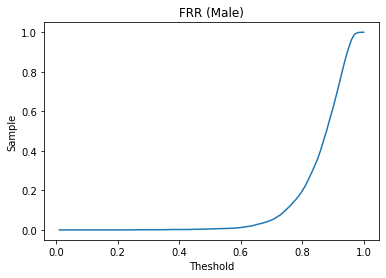

In [ ]:
plt.plot(theshold_list, facenet_male_frr)
plt.title("FRR (Male)")
plt.xlabel('Theshold')
plt.ylabel('Sample')
plt.show()

###หญิง

In [ ]:
facenet_female_frr = []
for i in range(100):
  thr = (i + 1 )/100 #กำหนด threshold
  facenet_frr_sum_reject = np.sum((facenet_frr_female_matric < thr) & (facenet_frr_female_matric > 0)) #นับจำนวนค่าที่มากกว่า thr และ มากกว่า 0 (จำนวน genuine sample ที่ถูก reject)
  facenet_frr_sum_reject = np.sum(facenet_frr_sum_reject)

  facenet_frr_sum_allGenuine = np.sum(facenet_frr_female_matric > 0) #นับจำนวนค่าที่มากกว่า 0 (จำนวน genuine sample ทั้งหมด)
  facenet_frr_sum_allGenuine = np.sum(facenet_frr_sum_allGenuine)
  
  facenet_frr_sum = facenet_frr_sum_reject / facenet_frr_sum_allGenuine #จำนวน genuine sample ที่ถูก reject(น้อยกว่า thr และมากกว่า 0) หารด้วยจำนวน genuine sample ทั้งหมด
  #facenet_frr_sum_nparray = facenet_frr_sum.values # แปลง series เป็น nparray
  facenet_female_frr.append(facenet_frr_sum) #รวมค่า frr

In [ ]:
facenet_male_frr

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00013462574044157243,
 0.00013462574044157243,
 0.00013462574044157243,
 0.00026925148088314486,
 0.0004038772213247173,
 0.0005385029617662897,
 0.0005385029617662897,
 0.0008077544426494346,
 0.000942380183091007,
 0.000942380183091007,
 0.000942380183091007,
 0.000942380183091007,
 0.000942380183091007,
 0.000942380183091007,
 0.0012116316639741518,
 0.0013462574044157242,
 0.0016155088852988692,
 0.0020193861066235864,
 0.0020193861066235864,
 0.0020193861066235864,
 0.0020193861066235864,
 0.002154011847065159,
 0.002154011847065159,
 0.002557889068389876,
 0.0032310177705977385,
 0.0032310177705977385,
 0.0035002692514808833,
 0.0036348949919224557,
 0.0045772751750134625,
 0.00498115239633818,
 0.005385029617662897,
 0.006058158319870759,
 0.006462035541195477,
 0.006865912762520194,
 0.0071351642434033385,
 0.007539041464728056,
 0.008481421647819063,
 0.00

In [ ]:
import matplotlib.pyplot as plt

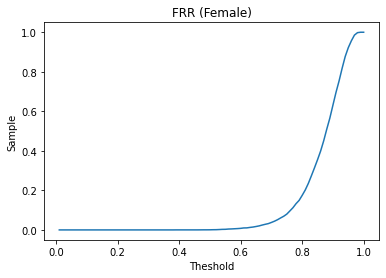

In [ ]:
plt.plot(theshold_list, facenet_female_frr)
plt.title("FRR (Female)")
plt.xlabel('Theshold')
plt.ylabel('Sample')
plt.show()

##FAR

In [ ]:
#โหลดข้อมูล Distance จากไฟล์ CSV
facenet_male_distance = pd.read_csv(path+'/facenet_distance_male.csv')
facenet_female_distance = pd.read_csv(path+'/facenet_distance_female.csv')

In [ ]:
#ลบ Column 'image_name' ออกจาก DataFrame
facenet_male_distance_noImgName = facenet_male_distance.drop("image_name", 1)
facenet_female_distance_noImgName = facenet_female_distance.drop("image_name", 1)

In [ ]:
#โหลดข้อมูล Masking จากไฟล์ CSV
masking_male_matric_far = pd.read_csv(path+'/facenet_male_masking_complete.csv')
masking_female_matric_far = pd.read_csv(path+'/facenet_female_masking_complete.csv')

In [ ]:
#ลบ Column 'image_name' ออกจาก DataFrame
masking_male_matric_far = masking_male_matric_far.drop("image_name", 1)
masking_female_matric_far = masking_female_matric_far.drop("image_name", 1)

In [ ]:
masking_male_matric_far = 1 - masking_male_matric_far
masking_male_matric_far

,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,m_11_10.jpg,m_11_12.jpg,m_11_16.jpg,m_11_15.jpg,m_11_14.jpg,m_11_13.jpg,m_11_17.jpg,m_10_3.jpg,m_10_1.jpg,m_10_2.jpg,m_10_4.jpg,m_10_6.jpg,m_10_5.jpg,m_10_8.jpg,m_10_9.jpg,m_10_7.jpg,m_10_13.jpg,m_10_14.jpg,m_10_12.jpg,m_10_10.jpg,m_10_11.jpg,m_10_16.jpg,m_10_15.jpg,m_10_17.jpg,m_14_1.jpg,m_14_4.jpg,m_14_2.jpg,m_14_3.jpg,m_14_6.jpg,m_14_7.jpg,...,m_7_9.jpg,m_7_10.jpg,m_7_13.jpg,m_7_12.jpg,m_7_16.jpg,m_7_15.jpg,m_7_14.jpg,m_7_17.jpg,m_55_1.jpg,m_55_2.jpg,m_55_5.jpg,m_55_3.jpg,m_55_7.jpg,m_55_6.jpg,m_55_8.jpg,m_55_9.jpg,m_55_10.jpg,m_55_12.jpg,m_55_13.jpg,m_55_11.jpg,m_55_14.jpg,m_55_16.jpg,m_55_15.jpg,m_55_17.jpg,m_9_2.jpg,m_9_1.jpg,m_9_4.jpg,m_9_6.jpg,m_9_5.jpg,m_9_7.jpg,m_9_10.jpg,m_9_9.jpg,m_9_8.jpg,m_9_12.jpg,m_9_11.jpg,m_9_13.jpg,m_9_14.jpg,m_9_15.jpg,m_9_17.jpg,m_9_16.jpg
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
936,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
937,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
938,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.

In [ ]:
masking_female_matric_far = 1 - masking_female_matric_far
masking_female_matric_far

,w_12_1.jpg,w_12_2.jpg,w_12_7.jpg,w_12_6.jpg,w_12_5.jpg,w_12_8.jpg,w_12_10.jpg,w_12_9.jpg,w_12_11.jpg,w_12_12.jpg,w_12_13.jpg,w_12_14.jpg,w_12_15.jpg,w_12_16.jpg,w_12_17.jpg,w_10_2.jpg,w_10_3.jpg,w_10_1.jpg,w_10_5.jpg,w_10_4.jpg,w_10_6.jpg,w_10_7.jpg,w_10_8.jpg,w_10_11.jpg,w_10_10.jpg,w_10_9.jpg,w_10_14.jpg,w_10_12.jpg,w_10_13.jpg,w_10_15.jpg,w_10_16.jpg,w_10_17.jpg,w_1_1.jpg,w_1_2.jpg,w_1_4.jpg,w_1_3.jpg,w_1_6.jpg,w_1_7.jpg,w_1_5.jpg,w_1_9.jpg,...,w_8_12.jpg,w_8_14.jpg,w_8_15.jpg,w_8_13.jpg,w_8_16.jpg,w_8_17.jpg,w_6_1.jpg,w_6_2.jpg,w_6_5.jpg,w_6_3.jpg,w_6_4.jpg,w_6_6.jpg,w_6_7.jpg,w_6_8.jpg,w_6_11.jpg,w_6_9.jpg,w_6_10.jpg,w_6_12.jpg,w_6_13.jpg,w_6_14.jpg,w_6_16.jpg,w_6_15.jpg,w_6_17.jpg,w_51_1.jpg,w_51_3.jpg,w_51_2.jpg,w_51_5.jpg,w_51_4.jpg,w_51_8.jpg,w_51_6.jpg,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
856,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
857,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
858,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,..

In [ ]:
facenet_male_far_matric = facenet_male_distance_noImgName.multiply(masking_male_matric_far)
facenet_female_far_matric = facenet_female_distance_noImgName.multiply(masking_female_matric_far)

###ชาย

In [ ]:
theshold_list = []
for i in range(100):
  thr = (i + 1 )/100 #กำหนด theshold
  #print(thr)
  theshold_list.append(thr)

In [ ]:
facenet_male_far = []
for i in range(100):
  thr = (i + 1) / 100 #กำหนด theshold
  facenet_male_far_sum_accept = np.sum(facenet_male_far_matric > thr) #นับจำนวนค่าที่มากกว่า thr และ มากกว่า 0 (จำนวน genuine sample ที่ถูก reject)
  facenet_male_far_sum_accept = np.sum(facenet_male_far_sum_accept)

  facenet_male_far_sum_allImposter = np.sum(facenet_male_far_matric > 0) #นับจำนวนค่าที่มากกว่า 0 (จำนวน genuine sample ทั้งหมด)
  facenet_male_far_sum_allImposter = np.sum(facenet_male_far_sum_allImposter)

  facenet_male_far_sum = facenet_male_far_sum_accept / facenet_male_far_sum_allImposter #จำนวน genuine sample ที่ถูก reject(น้อยกว่า thr และมากกว่า 0) หารด้วยจำนวน genuine sample ทั้งหมด
  #facenet_far_sum_nparray = vgg_far_sum.values # แปลง series เป็น nparray
  facenet_male_far.append(facenet_male_far_sum) #รวมค่า frr

In [ ]:
facenet_male_far

[0.9982397699779094,
 0.9961920123426488,
 0.9941419170845167,
 0.991776242738759,
 0.989146417008544,
 0.9865072407868438,
 0.9835127458887057,
 0.9801909837885854,
 0.976413385228561,
 0.972366960038337,
 0.9679465151887046,
 0.9632011407599612,
 0.957985904134086,
 0.9524176864546443,
 0.9461925967483665,
 0.9392007667403018,
 0.9321458209147119,
 0.9243591991304043,
 0.9158455766331218,
 0.9067872880068258,
 0.8969996610446836,
 0.8864149046834274,
 0.8747828932758278,
 0.8626272543450565,
 0.8494898138083383,
 0.8353191439625045,
 0.8201900487394369,
 0.803822013394579,
 0.7863856843975362,
 0.7683696249284103,
 0.7490211204226422,
 0.7284734153838961,
 0.7067031335834589,
 0.6842806550019286,
 0.660867024322966,
 0.6368900265320195,
 0.6114847411667076,
 0.5857451757307993,
 0.559007445328845,
 0.5316759587175801,
 0.5048119966805755,
 0.47730518835396285,
 0.45011162149210465,
 0.42244117956450083,
 0.394925020746403,
 0.36787171125682294,
 0.3412695629814042,
 0.314947929450541

### หญิง

In [ ]:
theshold_list = []
for i in range(100):
  thr = (i + 1 )/100 #กำหนด theshold
  #print(thr)
  theshold_list.append(thr)

In [ ]:
facenet_female_far = []
for i in range(100):
  thr = (i + 1) / 100 #กำหนด theshold
  facenet_female_far_sum_accept = np.sum(facenet_female_far_matric > thr) #นับจำนวนค่าที่มากกว่า thr และ มากกว่า 0 (จำนวน genuine sample ที่ถูก reject)
  facenet_female_far_sum_accept = np.sum(facenet_female_far_sum_accept)

  facenet_female_far_sum_allImposter = np.sum(facenet_female_far_matric > 0) #นับจำนวนค่าที่มากกว่า 0 (จำนวน genuine sample ทั้งหมด)
  facenet_female_far_sum_allImposter = np.sum(facenet_female_far_sum_allImposter)

  facenet_female_far_sum = facenet_female_far_sum_accept / facenet_female_far_sum_allImposter #จำนวน genuine sample ที่ถูก reject(น้อยกว่า thr และมากกว่า 0) หารด้วยจำนวน genuine sample ทั้งหมด
  #facenet_far_sum_nparray = facenet_far_sum.values # แปลง series เป็น nparray
  facenet_female_far.append(facenet_female_far_sum) #รวมค่า frr

In [ ]:
facenet_female_far

[0.9998344197239225,
 0.9995832896385383,
 0.9992714467852589,
 0.9989264878767641,
 0.9984545840899433,
 0.997935765891567,
 0.9972706851159889,
 0.9964124273516539,
 0.9953582329272938,
 0.9941329388843201,
 0.9926178793582109,
 0.9909482782410959,
 0.9887846959670165,
 0.9862678757706382,
 0.98348060779,
 0.9801441652270382,
 0.9764158493440261,
 0.9721825136189777,
 0.967168190925097,
 0.9614363537015471,
 0.9551691402520132,
 0.9481347381899868,
 0.9399191968252741,
 0.930809521969743,
 0.9206346140047797,
 0.9096483626870367,
 0.8973623062020852,
 0.8838951104144475,
 0.8691501868297449,
 0.853157891831925,
 0.836105883067209,
 0.8171938558678891,
 0.7972083165453331,
 0.7757049580254,
 0.7526727416230179,
 0.7289616460887179,
 0.7034953996279963,
 0.6771515777040639,
 0.6501564733608932,
 0.6226094347641309,
 0.5944193927619342,
 0.5650399324432474,
 0.5355335272462344,
 0.5054669087818259,
 0.4754527240715086,
 0.44587456742152876,
 0.4165972149397564,
 0.3873805752258791,
 0.3

In [ ]:
import matplotlib.pyplot as plt

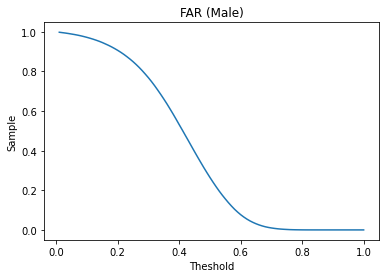

In [ ]:
plt.plot(theshold_list, facenet_male_far) # plotting by columns
plt.title("FAR (Male)")
plt.xlabel('Theshold')
plt.ylabel('Sample')
plt.show()

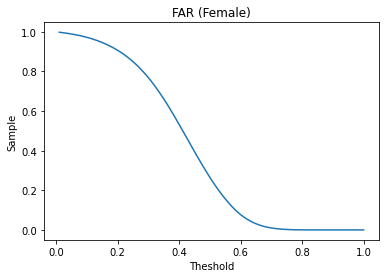

In [ ]:
plt.plot(theshold_list, facenet_male_far) # plotting by columns
plt.title("FAR (Female)")
plt.xlabel('Theshold')
plt.ylabel('Sample')
plt.show()

กราฟ FRR และ FAR แบบแยกชายหญิง

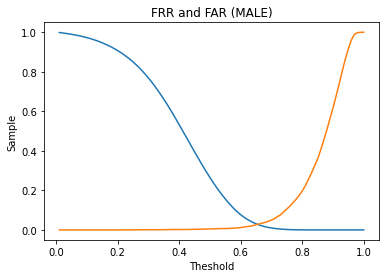

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.plot(theshold_list, facenet_male_far) # plotting by columns
plt.plot(theshold_list, facenet_male_frr)
plt.title("FRR and FAR (MALE)")
plt.xlabel('Theshold')
plt.ylabel('Sample')


plt.figure(figsize=(10, 10))
plt.show()

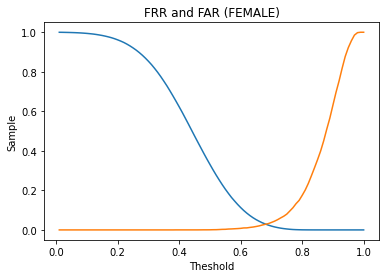

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.plot(theshold_list, facenet_female_far) # plotting by columns
plt.plot(theshold_list, facenet_female_frr)
plt.title("FRR and FAR (FEMALE)")
plt.xlabel('Theshold')
plt.ylabel('Sample')


plt.figure(figsize=(10, 10))
plt.show()

## EER

In [ ]:
from sklearn import metrics
from scipy.optimize import brentq
from scipy.interpolate import interp1d

def cal_eer(frr, far):
    fpr, tpr, thresholds = metrics.roc_curve([1] * len(frr) + [0] * len(far), frr + far, pos_label=1)

    thresh = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
    eer = interp1d(fpr, thresholds)(thresh)
    return eer, thresh

ผู้ชาย

In [ ]:
male_err, male_thr = cal_eer(facenet_male_frr, facenet_male_far)

In [ ]:
print("male EER = ",male_err)

male EER =  0.028765033207682613


In [ ]:
print("male threshold = ", male_thr)

male threshold =  0.6466666666666667


ผู้หญิง

In [ ]:
female_err, female_thr = cal_eer(facenet_female_frr, facenet_female_far)

In [ ]:
print("female EER = ",female_err)

female EER =  0.029981068655104373


In [ ]:
print("female threshold = ", female_thr)

female threshold =  0.679999999999987


# Dictionary Attack


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%ls

align.py                             facenet_model.json
assets/                              facenet_weights.h5
data.py                              Images/
facenet_distance.csv                 Images_test/
facenet_distance_female.csv          mmod_human_face_detector.dat
facenet_distance_male.csv            modelfacenet.py
facenet_encode.csv                   model.py
facenet_female_masking_complete.csv  MTCNN_crop/
FaceNet.ipynb                        nn4.small2.v1.h5
facenet_keras.h5                     official.py
facenet_male_masking_complete.csv    __pycache__/
facenet_masking_complete.csv         saved_model.pb
facenet_masking.csv                  Test_MTCNN_crop/
facenet_masking_female.csv           utils.py
facenet_masking_male.csv             variables/


In [ ]:
facenet_far = pd.read_csv(path+'/facenet_far_matric.csv')
facenet_far

,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,...,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.341851,0.190496,0.261781,0.228425,0.273005,0.171959,0.256462,0.285001,0.301717,0.200838
1,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.232559,0.126705,0.167603,0.135027,0.202186,0.124562,0.178227,0.202203,0.217537,0.120889
2,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.253091,0.107108,0.237182,0.143237,0.192262,0.106257,0.193019,0.242747,0.224473,0.200131
3,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.180103,0.117637,0.118174,0.133128,0.169764,0.100642,0.150153,0.221730,0.184558,0.096794
4,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.238933,0.186194,0.189351,0.182229,0.208367,0.212621,0.264575,0.299157,0.211404,0.173277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.171959,0.124562,0.106257,0.100642,0.212621,0.112708,0.120442,0.167119,0.156403,0.165679,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
1796,0.256462,0.178227,0.193019,0.150153,0.264575,0.192177,0.180610,0.238974,0.207282,0.236641,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
1797,0.285001,0.202203,0.242747,0.221730,0.299157,0.220155,0.187417,0.258400,0.261890,0.270306,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
1798,0.301717,0.217537,0.224473,0.184558,0.211404,0.264550,0.251115,0.277401,0.271369,0.282866,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000


In [ ]:
facenet_thr = 0.6499999999997914

In [ ]:
#row
len(facenet_far)

1800

In [ ]:
#column
col_name = list(facenet_far)
col_name[1][:]

'm_11_4.jpg'

In [ ]:
facenet_user = {}
for i in range(len(col_name)):
  facenet_user[col_name[i][:]] = 0

In [ ]:
len(facenet_user)

1800

In [ ]:
for i in range(len(facenet_far)):
  count = 0
  for j in range(len(col_name)):
    #user[col_name[j][:4]] = count
    if facenet_far[col_name[j]][i] > facenet_thr:
      count += 1
      facenet_user[col_name[j][:]] += 1
      #print(count)

In [ ]:
facenet_user

{'m_11_1.jpg': 88,
 'm_11_4.jpg': 31,
 'm_11_2.jpg': 43,
 'm_11_5.jpg': 7,
 'm_11_3.jpg': 5,
 'm_11_9.jpg': 64,
 'm_11_8.jpg': 80,
 'm_11_7.jpg': 60,
 'm_11_6.jpg': 21,
 'm_11_11.jpg': 48,
 'm_11_10.jpg': 52,
 'm_11_12.jpg': 64,
 'm_11_16.jpg': 22,
 'm_11_15.jpg': 73,
 'm_11_14.jpg': 63,
 'm_11_13.jpg': 60,
 'm_11_17.jpg': 56,
 'm_10_3.jpg': 7,
 'm_10_1.jpg': 22,
 'm_10_2.jpg': 3,
 'm_10_4.jpg': 1,
 'm_10_6.jpg': 26,
 'm_10_5.jpg': 2,
 'm_10_8.jpg': 23,
 'm_10_9.jpg': 11,
 'm_10_7.jpg': 15,
 'm_10_13.jpg': 12,
 'm_10_14.jpg': 19,
 'm_10_12.jpg': 24,
 'm_10_10.jpg': 15,
 'm_10_11.jpg': 28,
 'm_10_16.jpg': 16,
 'm_10_15.jpg': 7,
 'm_10_17.jpg': 47,
 'm_14_1.jpg': 113,
 'm_14_4.jpg': 32,
 'm_14_2.jpg': 32,
 'm_14_3.jpg': 12,
 'm_14_6.jpg': 105,
 'm_14_7.jpg': 91,
 'm_14_5.jpg': 40,
 'm_14_11.jpg': 121,
 'm_14_12.jpg': 96,
 'm_14_8.jpg': 77,
 'm_14_9.jpg': 109,
 'm_14_10.jpg': 94,
 'm_14_13.jpg': 109,
 'm_14_15.jpg': 83,
 'm_14_14.jpg': 90,
 'm_14_17.jpg': 110,
 'm_14_16.jpg': 51,
 'm_13_4

In [ ]:
facenet_sortedUser = sorted(facenet_user.items(), key=lambda x: x[1], reverse=True)
facenet_sortedUser

In [ ]:
facenet_sortedUser

[('w_6_13.jpg', 266),
 ('w_6_6.jpg', 232),
 ('w_6_1.jpg', 226),
 ('w_24_14.jpg', 203),
 ('w_6_12.jpg', 201),
 ('w_6_7.jpg', 200),
 ('w_33_17.jpg', 195),
 ('w_6_11.jpg', 195),
 ('w_6_14.jpg', 194),
 ('w_6_8.jpg', 192),
 ('w_33_1.jpg', 188),
 ('w_33_3.jpg', 187),
 ('w_24_6.jpg', 184),
 ('w_24_13.jpg', 184),
 ('w_33_13.jpg', 183),
 ('w_33_10.jpg', 182),
 ('w_19_9.jpg', 180),
 ('w_33_11.jpg', 179),
 ('w_6_15.jpg', 179),
 ('w_20_17.jpg', 178),
 ('w_6_3.jpg', 178),
 ('w_32_9.jpg', 177),
 ('w_20_9.jpg', 174),
 ('w_32_11.jpg', 174),
 ('w_33_16.jpg', 173),
 ('w_33_7.jpg', 171),
 ('w_32_1.jpg', 171),
 ('w_32_12.jpg', 171),
 ('w_33_6.jpg', 170),
 ('w_19_15.jpg', 166),
 ('w_24_12.jpg', 166),
 ('w_24_11.jpg', 166),
 ('w_33_15.jpg', 165),
 ('w_19_7.jpg', 163),
 ('w_24_15.jpg', 162),
 ('w_33_14.jpg', 162),
 ('w_33_12.jpg', 161),
 ('w_6_9.jpg', 161),
 ('w_6_10.jpg', 161),
 ('w_24_1.jpg', 159),
 ('w_33_9.jpg', 158),
 ('w_32_8.jpg', 158),
 ('w_24_10.jpg', 157),
 ('m_49_7.jpg', 156),
 ('w_24_7.jpg', 156)

In [ ]:
sum(x[1] for x in facenet_sortedUser)

70544

In [ ]:
facenet_far1st = facenet_far[facenet_sortedUser[0][0]].tolist() 
facenet_far2nd = facenet_far[facenet_sortedUser[1][0]].tolist() 
facenet_far3rd = facenet_far[facenet_sortedUser[2][0]].tolist() 
facenet_far4th = facenet_far[facenet_sortedUser[3][0]].tolist() 
facenet_far5th = facenet_far[facenet_sortedUser[4][0]].tolist() 

In [ ]:
facenet_ImgName_list = facenet_far.columns.values.tolist()

In [ ]:
facenet_far1st

[0.540923472417863,
 0.3649487878848808,
 0.4537530370228363,
 0.3515751765880462,
 0.2735133138168543,
 0.5046734942801965,
 0.5161639712621122,
 0.4373213674400431,
 0.4829696017562706,
 0.4794165102470151,
 0.465898503714537,
 0.487910931807071,
 0.4385600430889476,
 0.5023530045664385,
 0.4788632909538792,
 0.5087633734051805,
 0.4221923413986486,
 0.354267417259852,
 0.437267617681241,
 0.4120610818256283,
 0.3916097319405915,
 0.4078161037967418,
 0.4189865698845587,
 0.4252441616831636,
 0.3977074205978472,
 0.4188703316513512,
 0.3736180611349327,
 0.4322398600910476,
 0.4585209652574651,
 0.3820112947410043,
 0.4448834786059584,
 0.3820655639635613,
 0.3406521993795742,
 0.4937763250403724,
 0.5658547498844285,
 0.3889271702346187,
 0.4054854012422105,
 0.3768465022022542,
 0.565900846402675,
 0.4587864186644559,
 0.4222423308454704,
 0.5048587962905802,
 0.5266421713264529,
 0.43352014072759,
 0.4703763538880529,
 0.5131180999554046,
 0.5391107463112116,
 0.4983379685587118,


In [ ]:
for i in range(len(facenet_far5th)):
  #อันดับ1
  if facenet_far1st[i] > facenet_thr:
    facenet_far1st[i] = (facenet_ImgName_list[i], 1)
  else:
    facenet_far1st[i] = (facenet_ImgName_list[i], 0)
  #อันดับ2
  if facenet_far2nd[i] > facenet_thr:
    facenet_far2nd[i] = (facenet_ImgName_list[i], 1)
  else:
    facenet_far2nd[i] = (facenet_ImgName_list[i], 0)
  #อันดับ3
  if facenet_far3rd[i] > facenet_thr:
    facenet_far3rd[i] = (facenet_ImgName_list[i], 1)
  else:
    facenet_far3rd[i] = (facenet_ImgName_list[i], 0)
  #อันดับ4
  if facenet_far4th[i] > facenet_thr:
    facenet_far4th[i] = (facenet_ImgName_list[i], 1)
  else:
    facenet_far4th[i] = (facenet_ImgName_list[i], 0)
  #อันดับ5
  if facenet_far5th[i] > facenet_thr:
    facenet_far5th[i] = (facenet_ImgName_list[i], 1)
  else:
    facenet_far5th[i] = (facenet_ImgName_list[i], 0)

In [ ]:
facenet_far1stForUnion = facenet_far1st
facenet_far2ndForUnion = facenet_far2nd
facenet_far3rdForUnion = facenet_far3rd
facenet_far4thForUnion = facenet_far4th
facenet_far5thForUnion = facenet_far5th

In [ ]:
facenet_far1stForUnion[0][1]

0

In [ ]:
count = 0
for i in range(len(facenet_far1stForUnion)):
  if facenet_far1stForUnion[i][1] == 1:
    #print(mostFAR[i])
    count +=1
print(count)

266


### 5 อันดับ

In [ ]:
facenet_union_5 =list(set().union(facenet_far1stForUnion,facenet_far2ndForUnion,facenet_far3rdForUnion,facenet_far4thForUnion,facenet_far5thForUnion))
facenet_sortedUnion_5 = sorted(facenet_union_5, key=lambda x: x[0], reverse=False)
#facenet_sortedUnion_5

In [ ]:
facenet_resultUnion_5 = []
for i in range(len(facenet_sortedUnion_5)):
  if facenet_sortedUnion_5[i][1] == 1:
    facenet_resultUnion_5.append(facenet_sortedUnion_5[i])

len(facenet_resultUnion_5)

409

### 4 อันดับ

In [ ]:
facenet_union_4 =list(set().union(facenet_far1stForUnion,facenet_far2ndForUnion,facenet_far3rdForUnion,facenet_far4thForUnion))
facenet_sortedUnion_4 = sorted(facenet_union_4, key=lambda x: x[0], reverse=False)
#facenet_sortedUnion_5

In [ ]:
facenet_resultUnion_4 = []
for i in range(len(facenet_sortedUnion_4)):
  if facenet_sortedUnion_4[i][1] == 1:
    facenet_resultUnion_4.append(facenet_sortedUnion_4[i])

len(facenet_resultUnion_4)

399

### 3 อันดับ

In [ ]:
facenet_union_3 =list(set().union(facenet_far1stForUnion,facenet_far2ndForUnion,facenet_far3rdForUnion))
facenet_sortedUnion_3 = sorted(facenet_union_3, key=lambda x: x[0], reverse=False)
#facenet_sortedUnion_5

In [ ]:
facenet_resultUnion_3 = []
for i in range(len(facenet_sortedUnion_3)):
  if facenet_sortedUnion_3[i][1] == 1:
    facenet_resultUnion_3.append(facenet_sortedUnion_3[i])

len(facenet_resultUnion_3)

308

### 2 อันดับ

In [ ]:
facenet_union_2 =list(set().union(facenet_far1stForUnion,facenet_far2ndForUnion))
facenet_sortedUnion_2 = sorted(facenet_union_2, key=lambda x: x[0], reverse=False)
#facenet_sortedUnion_5

In [ ]:
facenet_resultUnion_2 = []
for i in range(len(facenet_sortedUnion_2)):
  if facenet_sortedUnion_2[i][1] == 1:
    facenet_resultUnion_2.append(facenet_sortedUnion_2[i])

len(facenet_resultUnion_2)

304

### 1 อันดับ


In [ ]:
facenet_sortedUnion_1 = facenet_far1stForUnion
facenet_resultUnion_1 = []
for i in range(len(facenet_sortedUnion_1)):
  if facenet_sortedUnion_1[i][1] == 1:
    facenet_resultUnion_1.append(facenet_sortedUnion_1[i])

len(facenet_resultUnion_1)

266

### Calculate Percentage

In [ ]:
#คิดเป็น percent
no1 = (facenet_sortedUser[0][1]/1800)*100
no2 = (facenet_sortedUser[1][1]/1800)*100
no3 = (facenet_sortedUser[2][1]/1800)*100
no4 = (facenet_sortedUser[3][1]/1800)*100
no5 = (facenet_sortedUser[4][1]/1800)*100
#Facenet 5 อันดับแรกที่มี FAR สูงที่สุด (จากทั้งหมด 1800)
print(' FACENET 5 อันดับแรกที่มี FAR สูงที่สุด (จากทั้งหมด 1800)\n No1: {0[0]} จำนวน {0[1]}/1800 ({5} %) \n No2: {1[0]} จำนวน {1[1]}/1800 ({6} %) \n No3: {2[0]} จำนวน {2[1]}/1800 ({7} %) \n No4: {3[0]} จำนวน {3[1]}/1800 ({8} %) \n No5: {4[0]} จำนวน {4[1]}/1800 ({9} %)\n'
.format(facenet_sortedUser[0], facenet_sortedUser[1], facenet_sortedUser[2], facenet_sortedUser[3], facenet_sortedUser[4], no1, no2, no3, no4, no5))

 FACENET 5 อันดับแรกที่มี FAR สูงที่สุด (จากทั้งหมด 1800)
 No1: w_6_13.jpg จำนวน 266/1800 (14.777777777777779 %) 
 No2: w_6_6.jpg จำนวน 232/1800 (12.88888888888889 %) 
 No3: w_6_1.jpg จำนวน 226/1800 (12.555555555555555 %) 
 No4: w_24_14.jpg จำนวน 203/1800 (11.277777777777779 %) 
 No5: w_6_12.jpg จำนวน 201/1800 (11.166666666666666 %)



In [ ]:
#เมื่อนำ Facenet 5 อันดับมา union กัน
facenet_unionResult_5 = (len(facenet_resultUnion_5)/1800)*100
facenet_unionResult_4 = (len(facenet_resultUnion_4)/1800)*100
facenet_unionResult_3 = (len(facenet_resultUnion_3)/1800)*100
facenet_unionResult_2 = (len(facenet_resultUnion_2)/1800)*100
facenet_unionResult_1 = (len(facenet_resultUnion_1)/1800)*100
print(' 5 Attempts: Facenet Success Rate = {0} % \n 4 Attempts: Facenet Success Rate = {1} % \n 3 Attempts: Facenet Success Rate = {2} % \n 2 Attempts: Facenet Success Rate = {3} % \n 1 Attempt: Facenet Success Rate = {4} % \n'
.format(facenet_unionResult_5, facenet_unionResult_4, facenet_unionResult_3, facenet_unionResult_2, facenet_unionResult_1))

 5 Attempts: Facenet Success Rate = 22.72222222222222 % 
 4 Attempts: Facenet Success Rate = 22.166666666666668 % 
 3 Attempts: Facenet Success Rate = 17.11111111111111 % 
 2 Attempts: Facenet Success Rate = 16.88888888888889 % 
 1 Attempt: Facenet Success Rate = 14.777777777777779 % 



### ระบุคนที่ถูกโจมตีบ่อยที่สุด

In [ ]:
facenet_far1stAttackWho = {}

In [ ]:
for i in range(len(facenet_far1stForUnion)):
    if facenet_far1stForUnion[i][0][:4] in facenet_far1stAttackWho:
      pass
    else:
      facenet_far1stAttackWho[facenet_far1stForUnion[i][0][:4]] = 0

In [ ]:
len(facenet_far1stAttackWho)

107

In [ ]:
#FACENET
facenet_far2ndAttackWho = facenet_far1stAttackWho.copy()
facenet_far3rdAttackWho = facenet_far1stAttackWho.copy()
facenet_far4thAttackWho = facenet_far1stAttackWho.copy()
facenet_far5thAttackWho = facenet_far1stAttackWho.copy()

In [ ]:
for i in range(len(facenet_far1stForUnion)):
  #FACENET
  if facenet_far1stForUnion[i][1] == 1:
    facenet_far1stAttackWho[facenet_far1stForUnion[i][0][:4]] += 1
  if facenet_far2ndForUnion[i][1] == 1:
    facenet_far2ndAttackWho[facenet_far2ndForUnion[i][0][:4]] += 1
  if facenet_far3rdForUnion[i][1] == 1:
    facenet_far3rdAttackWho[facenet_far3rdForUnion[i][0][:4]] += 1
  if facenet_far4thForUnion[i][1] == 1:
    facenet_far4thAttackWho[facenet_far4thForUnion[i][0][:4]] += 1
  if facenet_far5thForUnion[i][1] == 1:
    facenet_far5thAttackWho[facenet_far5thForUnion[i][0][:4]] += 1

In [ ]:
facenet_far1stAttackWho

{'m_10': 0,
 'm_11': 0,
 'm_12': 0,
 'm_13': 0,
 'm_14': 0,
 'm_15': 9,
 'm_16': 0,
 'm_17': 0,
 'm_18': 0,
 'm_19': 0,
 'm_1_': 0,
 'm_20': 0,
 'm_21': 0,
 'm_22': 0,
 'm_23': 0,
 'm_24': 0,
 'm_25': 0,
 'm_26': 0,
 'm_27': 0,
 'm_28': 0,
 'm_29': 0,
 'm_2_': 3,
 'm_30': 0,
 'm_31': 0,
 'm_32': 1,
 'm_33': 0,
 'm_34': 0,
 'm_35': 10,
 'm_36': 0,
 'm_37': 0,
 'm_38': 0,
 'm_39': 0,
 'm_3_': 6,
 'm_40': 0,
 'm_41': 0,
 'm_42': 0,
 'm_43': 0,
 'm_44': 0,
 'm_45': 0,
 'm_46': 0,
 'm_47': 0,
 'm_48': 0,
 'm_49': 0,
 'm_4_': 0,
 'm_50': 0,
 'm_51': 0,
 'm_52': 0,
 'm_53': 0,
 'm_54': 0,
 'm_55': 0,
 'm_56': 0,
 'm_5_': 0,
 'm_6_': 0,
 'm_7_': 0,
 'm_8_': 0,
 'm_9_': 0,
 'w_10': 0,
 'w_11': 7,
 'w_12': 0,
 'w_13': 0,
 'w_14': 12,
 'w_15': 0,
 'w_16': 14,
 'w_17': 16,
 'w_18': 0,
 'w_19': 7,
 'w_1_': 0,
 'w_20': 3,
 'w_21': 1,
 'w_22': 0,
 'w_23': 2,
 'w_24': 17,
 'w_25': 0,
 'w_26': 12,
 'w_27': 13,
 'w_28': 0,
 'w_29': 11,
 'w_2_': 0,
 'w_30': 0,
 'w_31': 0,
 'w_32': 15,
 'w_33': 17,
 'w_34

In [ ]:
#FACENET
facenet_far1stAttackWho_sorted = sorted(facenet_far1stAttackWho.items(), key=lambda x: x[1], reverse=True)
facenet_far2ndAttackWho_sorted = sorted(facenet_far2ndAttackWho.items(), key=lambda x: x[1], reverse=True)
facenet_far3rdAttackWho_sorted = sorted(facenet_far3rdAttackWho.items(), key=lambda x: x[1], reverse=True)
facenet_far4thAttackWho_sorted = sorted(facenet_far4thAttackWho.items(), key=lambda x: x[1], reverse=True)
facenet_far5thAttackWho_sorted = sorted(facenet_far5thAttackWho.items(), key=lambda x: x[1], reverse=True)

### บุคคลที่ถูกโจมตีบ่อยที่สุดบน FACENET

In [ ]:
#FACENET รูป w_6_13.jpg จำนวน 266/1800 (14.777777777777779 %)
facenet_far1stAttackWho_sorted

[('w_24', 17),
 ('w_33', 17),
 ('w_17', 16),
 ('w_40', 16),
 ('w_32', 15),
 ('w_47', 15),
 ('w_16', 14),
 ('w_27', 13),
 ('w_38', 13),
 ('w_48', 13),
 ('w_14', 12),
 ('w_26', 12),
 ('w_29', 11),
 ('m_35', 10),
 ('m_15', 9),
 ('w_9_', 9),
 ('w_37', 8),
 ('w_11', 7),
 ('w_19', 7),
 ('w_4_', 7),
 ('m_3_', 6),
 ('w_39', 5),
 ('m_2_', 3),
 ('w_20', 3),
 ('w_23', 2),
 ('w_36', 2),
 ('m_32', 1),
 ('w_21', 1),
 ('w_34', 1),
 ('w_50', 1),
 ('m_11', 0),
 ('m_10', 0),
 ('m_14', 0),
 ('m_13', 0),
 ('m_17', 0),
 ('m_16', 0),
 ('m_1_', 0),
 ('m_12', 0),
 ('m_18', 0),
 ('m_27', 0),
 ('m_21', 0),
 ('m_25', 0),
 ('m_22', 0),
 ('m_20', 0),
 ('m_24', 0),
 ('m_19', 0),
 ('m_23', 0),
 ('m_26', 0),
 ('m_36', 0),
 ('m_31', 0),
 ('m_28', 0),
 ('m_29', 0),
 ('m_33', 0),
 ('m_30', 0),
 ('m_34', 0),
 ('m_39', 0),
 ('m_42', 0),
 ('m_41', 0),
 ('m_38', 0),
 ('m_4_', 0),
 ('m_45', 0),
 ('m_37', 0),
 ('m_44', 0),
 ('m_43', 0),
 ('m_40', 0),
 ('m_46', 0),
 ('m_53', 0),
 ('m_54', 0),
 ('m_5_', 0),
 ('m_47', 0),
 ('m_4

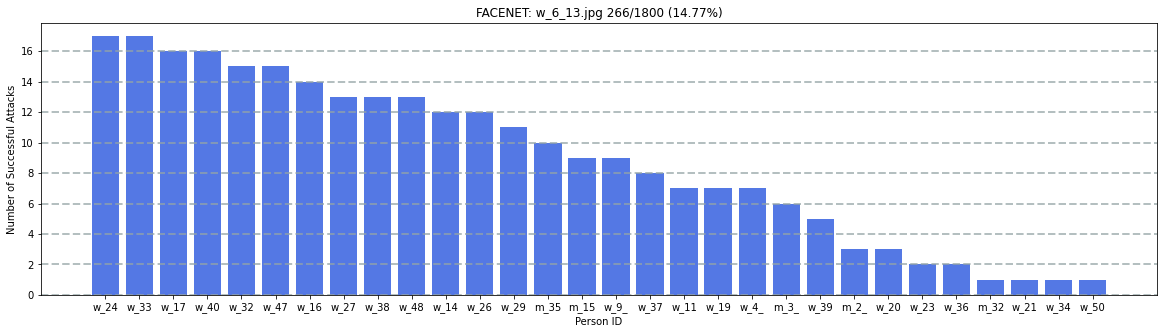

In [ ]:
#ลบตัวที่เป็น 0 ออก
facenet_far1stAttackWho_sorted_NoZero = []
for i in range(len(facenet_far1stAttackWho_sorted)):
  if facenet_far1stAttackWho_sorted[i][1] != 0:
    facenet_far1stAttackWho_sorted_NoZero.append(facenet_far1stAttackWho_sorted[i])

#แยกข้อมูลออกเป็น 2 list เพื่อนำไปพอตกราฟ
data_x, data_y = zip(*facenet_far1stAttackWho_sorted_NoZero)

#พอตกราฟ
plt.figure(figsize=(20, 5))
plt.bar(data_x, data_y, color='royalblue', alpha=0.9)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('FACENET: w_6_13.jpg 266/1800 (14.77%)')
plt.xlabel('Person ID')
plt.ylabel('Number of Successful Attacks')
plt.show()

In [ ]:
#FACENET รูป w_6_6.jpg จำนวน 232/1800 (12.88888888888889 %)
facenet_far2ndAttackWho_sorted

[('w_16', 17),
 ('w_33', 17),
 ('w_17', 16),
 ('w_40', 16),
 ('w_48', 15),
 ('w_11', 13),
 ('w_24', 13),
 ('w_37', 12),
 ('w_32', 12),
 ('w_9_', 11),
 ('w_29', 10),
 ('w_36', 10),
 ('w_26', 8),
 ('w_4_', 8),
 ('w_47', 8),
 ('w_27', 7),
 ('m_15', 6),
 ('w_38', 6),
 ('w_14', 5),
 ('m_3_', 4),
 ('m_35', 4),
 ('m_9_', 3),
 ('w_25', 3),
 ('w_35', 3),
 ('m_32', 1),
 ('w_23', 1),
 ('w_39', 1),
 ('w_50', 1),
 ('w_7_', 1),
 ('m_11', 0),
 ('m_10', 0),
 ('m_14', 0),
 ('m_13', 0),
 ('m_17', 0),
 ('m_16', 0),
 ('m_1_', 0),
 ('m_12', 0),
 ('m_18', 0),
 ('m_27', 0),
 ('m_21', 0),
 ('m_25', 0),
 ('m_22', 0),
 ('m_2_', 0),
 ('m_20', 0),
 ('m_24', 0),
 ('m_19', 0),
 ('m_23', 0),
 ('m_26', 0),
 ('m_36', 0),
 ('m_31', 0),
 ('m_28', 0),
 ('m_29', 0),
 ('m_33', 0),
 ('m_30', 0),
 ('m_34', 0),
 ('m_39', 0),
 ('m_42', 0),
 ('m_41', 0),
 ('m_38', 0),
 ('m_4_', 0),
 ('m_45', 0),
 ('m_37', 0),
 ('m_44', 0),
 ('m_43', 0),
 ('m_40', 0),
 ('m_46', 0),
 ('m_53', 0),
 ('m_54', 0),
 ('m_5_', 0),
 ('m_47', 0),
 ('m_48'

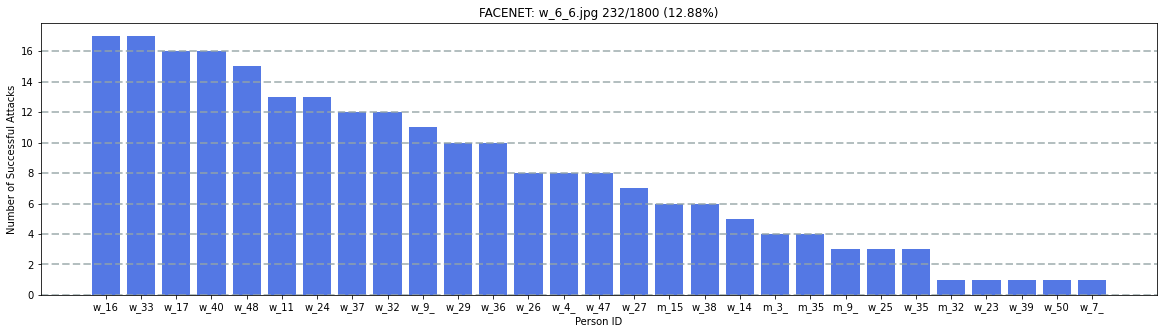

In [ ]:
#ลบตัวที่เป็น 0 ออก
facenet_far2ndAttackWho_sorted_NoZero = []
for i in range(len(facenet_far2ndAttackWho_sorted)):
  if facenet_far2ndAttackWho_sorted[i][1] != 0:
    facenet_far2ndAttackWho_sorted_NoZero.append(facenet_far2ndAttackWho_sorted[i])

#แยกข้อมูลออกเป็น 2 list เพื่อนำไปพอตกราฟ
data_x, data_y = zip(*facenet_far2ndAttackWho_sorted_NoZero)

#พอตกราฟ
plt.figure(figsize=(20, 5))
plt.bar(data_x, data_y, color='royalblue', alpha=0.9)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('FACENET: w_6_6.jpg 232/1800 (12.88%)')
plt.xlabel('Person ID')
plt.ylabel('Number of Successful Attacks')
plt.show()

In [ ]:
#FACENET รูป w_6_1.jpg จำนวน 226/1800 (12.555555555555555 %)
facenet_far3rdAttackWho_sorted

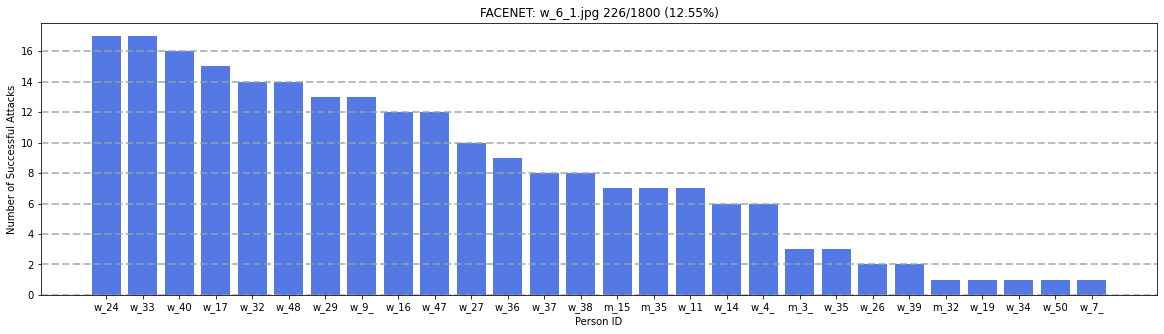

In [ ]:
#ลบตัวที่เป็น 0 ออก
facenet_far3rdAttackWho_sorted_NoZero = []
for i in range(len(facenet_far3rdAttackWho_sorted)):
  if facenet_far3rdAttackWho_sorted[i][1] != 0:
    facenet_far3rdAttackWho_sorted_NoZero.append(facenet_far3rdAttackWho_sorted[i])

#แยกข้อมูลออกเป็น 2 list เพื่อนำไปพอตกราฟ
data_x, data_y = zip(*facenet_far3rdAttackWho_sorted_NoZero)

#พอตกราฟ
plt.figure(figsize=(20, 5))
plt.bar(data_x, data_y, color='royalblue', alpha=0.9)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('FACENET: w_6_1.jpg 226/1800 (12.55%)')
plt.xlabel('Person ID')
plt.ylabel('Number of Successful Attacks')
plt.show()

In [ ]:
#FACENET รูป w_24_14.jpg จำนวน 203/1800 (11.277777777777779 %)
facenet_far4thAttackWho_sorted

[('w_14', 17),
 ('w_6_', 17),
 ('w_19', 16),
 ('w_22', 15),
 ('w_40', 15),
 ('w_16', 13),
 ('w_17', 13),
 ('w_20', 12),
 ('w_37', 12),
 ('w_26', 11),
 ('w_29', 9),
 ('w_49', 9),
 ('w_34', 7),
 ('w_44', 7),
 ('w_33', 6),
 ('w_9_', 6),
 ('w_27', 5),
 ('m_35', 4),
 ('w_30', 3),
 ('w_32', 3),
 ('w_51', 2),
 ('w_42', 1),
 ('m_11', 0),
 ('m_10', 0),
 ('m_14', 0),
 ('m_13', 0),
 ('m_17', 0),
 ('m_16', 0),
 ('m_1_', 0),
 ('m_12', 0),
 ('m_15', 0),
 ('m_18', 0),
 ('m_27', 0),
 ('m_21', 0),
 ('m_25', 0),
 ('m_22', 0),
 ('m_2_', 0),
 ('m_20', 0),
 ('m_24', 0),
 ('m_19', 0),
 ('m_23', 0),
 ('m_26', 0),
 ('m_36', 0),
 ('m_3_', 0),
 ('m_32', 0),
 ('m_31', 0),
 ('m_28', 0),
 ('m_29', 0),
 ('m_33', 0),
 ('m_30', 0),
 ('m_34', 0),
 ('m_39', 0),
 ('m_42', 0),
 ('m_41', 0),
 ('m_38', 0),
 ('m_4_', 0),
 ('m_45', 0),
 ('m_37', 0),
 ('m_44', 0),
 ('m_43', 0),
 ('m_40', 0),
 ('m_46', 0),
 ('m_53', 0),
 ('m_54', 0),
 ('m_5_', 0),
 ('m_47', 0),
 ('m_48', 0),
 ('m_51', 0),
 ('m_52', 0),
 ('m_49', 0),
 ('m_50', 

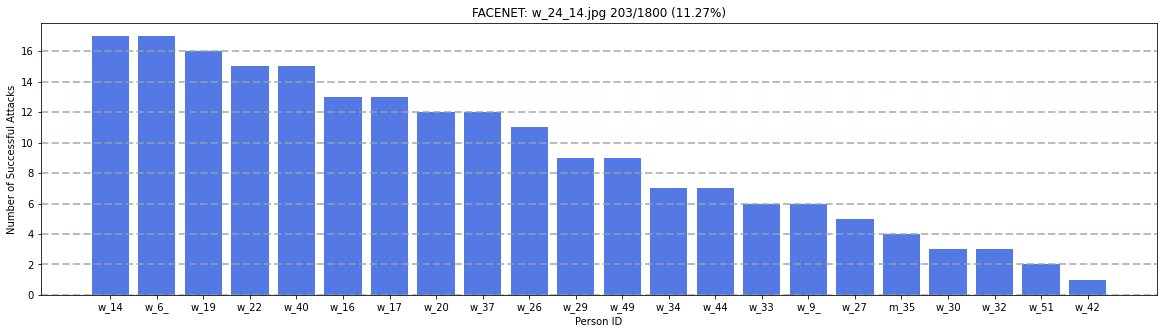

In [ ]:
#ลบตัวที่เป็น 0 ออก
facenet_far4thAttackWho_sorted_NoZero = []
for i in range(len(facenet_far4thAttackWho_sorted)):
  if facenet_far4thAttackWho_sorted[i][1] != 0:
    facenet_far4thAttackWho_sorted_NoZero.append(facenet_far4thAttackWho_sorted[i])

#แยกข้อมูลออกเป็น 2 list เพื่อนำไปพอตกราฟ
data_x, data_y = zip(*facenet_far4thAttackWho_sorted_NoZero)

#พอตกราฟ
plt.figure(figsize=(20, 5))
plt.bar(data_x, data_y, color='royalblue', alpha=0.9)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('FACENET: w_24_14.jpg 203/1800 (11.27%)')
plt.xlabel('Person ID')
plt.ylabel('Number of Successful Attacks')
plt.show()

In [ ]:
#FACENET รูป w_6_12.jpg จำนวน 201/1800 (11.166666666666666 %)
facenet_far5thAttackWho_sorted

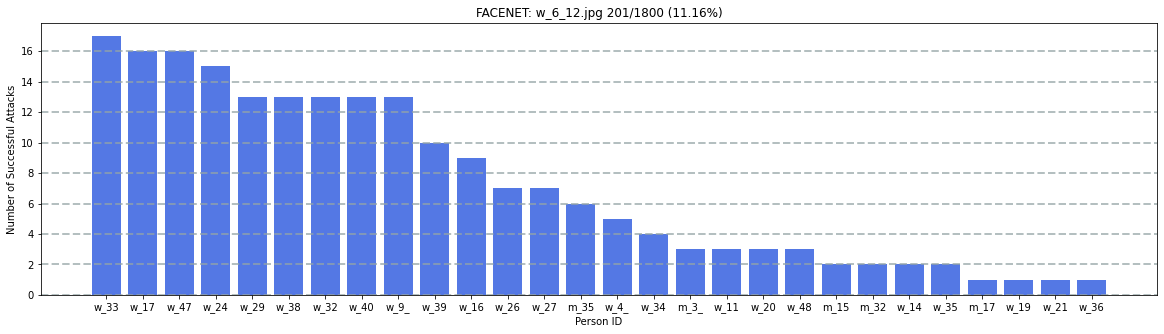

In [ ]:
#ลบตัวที่เป็น 0 ออก
facenet_far5thAttackWho_sorted_NoZero = []
for i in range(len(facenet_far5thAttackWho_sorted)):
  if facenet_far5thAttackWho_sorted[i][1] != 0:
    facenet_far5thAttackWho_sorted_NoZero.append(facenet_far5thAttackWho_sorted[i])

#แยกข้อมูลออกเป็น 2 list เพื่อนำไปพอตกราฟ
data_x, data_y = zip(*facenet_far5thAttackWho_sorted_NoZero)

#พอตกราฟ
plt.figure(figsize=(20, 5))
plt.bar(data_x, data_y, color='royalblue', alpha=0.9)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('FACENET: w_6_12.jpg 201/1800 (11.16%)')
plt.xlabel('Person ID')
plt.ylabel('Number of Successful Attacks')
plt.show()

#Bias Male | Female

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

FRR = Genuine 

FAR = Imposter

##FACENET - FRR

In [ ]:
facenet_frr_matric = pd.read_csv(path+'/facenet_frr_matric.csv')
facenet_frr_matric

,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,...,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,NaN,0.834057,0.877657,0.806896,0.608299,0.955451,0.938577,0.958371,0.926961,0.963159,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.834057,NaN,0.796967,0.926616,0.723877,0.842199,0.852137,0.870876,0.811191,0.863027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.877657,0.796967,NaN,0.759888,0.644897,0.840883,0.812561,0.852063,0.812154,0.866188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.806896,0.926616,0.759888,NaN,0.799989,0.841760,0.847060,0.852658,0.838887,0.847500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.608299,0.723877,0.644897,0.799989,NaN,0.641877,0.659291,0.677060,0.689285,0.647308,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.917759,0.950249,0.900458,0.951195,0.910832,NaN,0.942193,0.857404,0.873571,0.879005
1796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.937222,0.890393,0.880229,0.903851,0.913656,0.942193,NaN,0.879197,0.868688,0.843055
1797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.835287,0.819519,0.813104,0.810797,0.797601,0.857404,0.879197,NaN,0.835543,0.815398
1798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.824004,0.893680,0.901603,0.910235,0.837391,0.873571,0.868688,0.835543,NaN,0.867091


แยกเพศชาย

In [ ]:
facenet_frr_matric_male = facenet_frr_matric.copy(deep=True)
for i in facenet_frr_matric_male:
  #print(i.split('/')[-1])
  if "w" in i.split('/')[-1]:
    facenet_frr_matric_male.drop(i , axis=1, inplace=True)

In [ ]:
facenet_frr_matric_male

,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,...,m_9_10.jpg,m_9_9.jpg,m_9_8.jpg,m_9_12.jpg,m_9_11.jpg,m_9_13.jpg,m_9_14.jpg,m_9_15.jpg,m_9_17.jpg,m_9_16.jpg
0,NaN,0.834057,0.877657,0.806896,0.608299,0.955451,0.938577,0.958371,0.926961,0.963159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.834057,NaN,0.796967,0.926616,0.723877,0.842199,0.852137,0.870876,0.811191,0.863027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.877657,0.796967,NaN,0.759888,0.644897,0.840883,0.812561,0.852063,0.812154,0.866188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.806896,0.926616,0.759888,NaN,0.799989,0.841760,0.847060,0.852658,0.838887,0.847500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.608299,0.723877,0.644897,0.799989,NaN,0.641877,0.659291,0.677060,0.689285,0.647308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


แยกเพศหญิง

In [ ]:
facenet_frr_matric_female = facenet_frr_matric.copy(deep=True)
for i in facenet_frr_matric_female:
  #print(i.split('/')[-1])
  if "m" in i.split('/')[-1]:
    facenet_frr_matric_female.drop(i , axis=1, inplace=True)

In [ ]:
facenet_frr_matric_female

,w_12_1.jpg,w_12_2.jpg,w_12_7.jpg,w_12_6.jpg,w_12_5.jpg,w_12_8.jpg,w_12_10.jpg,w_12_9.jpg,w_12_11.jpg,w_12_12.jpg,...,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.917759,0.950249,0.900458,0.951195,0.910832,NaN,0.942193,0.857404,0.873571,0.879005
1796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.937222,0.890393,0.880229,0.903851,0.913656,0.942193,NaN,0.879197,0.868688,0.843055
1797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.835287,0.819519,0.813104,0.810797,0.797601,0.857404,0.879197,NaN,0.835543,0.815398
1798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.824004,0.893680,0.901603,0.910235,0.837391,0.873571,0.868688,0.835543,NaN,0.867091


In [ ]:
#เปลี่ยนข้อมูล NaN ให้เป็นค่า 0
facenet_frr_matric_female = facenet_frr_matric_female.fillna(0)
facenet_frr_matric_male = facenet_frr_matric_male.fillna(0)

In [ ]:
#เปลี่ยน Dataframe ให้เป็น List
facenet_frr_matric_female = facenet_frr_matric_female.values.tolist()
facenet_frr_matric_male = facenet_frr_matric_male.values.tolist()

In [ ]:
import itertools
facenet_frr_matric_female_1d = list(itertools.chain(*facenet_frr_matric_female))

In [ ]:
import itertools
facenet_frr_matric_male_1d = list(itertools.chain(*facenet_frr_matric_male))

In [ ]:
facenet_Genuine_Male = pd.DataFrame(
    {'Genuine_Male_facenet_frr': facenet_frr_matric_male_1d,
     #'Genuine_Female': facenet_frr_matric_female_1d,
    })

In [ ]:
facenet_Genuine_Female = pd.DataFrame(
    {#'Genuine_Male': facenet_frr_matric_male_1d,
     'Genuine_Female_facenet_frr': facenet_frr_matric_female_1d,
    })

In [ ]:
facenet_Genuine_Male = facenet_Genuine_Male.loc[~(facenet_Genuine_Male==0).all(axis=1)]
facenet_Genuine_Female = facenet_Genuine_Female.loc[~(facenet_Genuine_Female==0).all(axis=1)]

In [ ]:
facenet_Genuine_Male

,Genuine_Male_facenet_frr
1,0.834057
2,0.877657
3,0.806896
4,0.608299
5,0.955451
...,...
913674,0.811813
913675,0.816345
913676,0.833567
913677,0.856434


In [ ]:
facenet_Genuine_Female

,Genuine_Female_facenet_frr
737021,0.773064
737022,0.928907
737023,0.930662
737024,0.855395
737025,0.939893
...,...
1547994,0.824087
1547995,0.879005
1547996,0.843055
1547997,0.815398


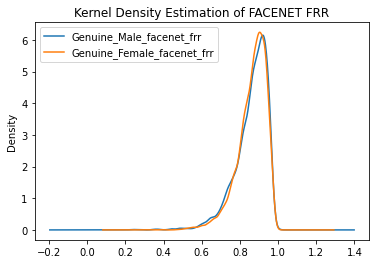

In [ ]:
ax = facenet_Genuine_Male.plot.kde(title="Kernel Density Estimation of FACENET FRR");
facenet_Genuine_Female.plot.kde(title="Kernel Density Estimation of FACENET FRR", ax=ax);

In [ ]:
from scipy import stats
data1 = facenet_Genuine_Male.to_numpy().flatten()
data2 = facenet_Genuine_Female.to_numpy().flatten()

In [ ]:
stats.ks_2samp(data1, data2,alternative='two-sided', mode='auto')

Ks_2sampResult(statistic=0.026517128536514653, pvalue=9.042163446353487e-05)

In [ ]:
stats.ks_2samp(data1, data2,alternative='two-sided', mode='exact')

Ks_2sampResult(statistic=0.026517128536514643, pvalue=1.0)

##FACENET - FAR

In [ ]:
facenet_far_matric = pd.read_csv(path+'/facenet_far_matric.csv')
facenet_far_matric

,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,...,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.341851,0.190496,0.261781,0.228425,0.273005,0.171959,0.256462,0.285001,0.301717,0.200838
1,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.232559,0.126705,0.167603,0.135027,0.202186,0.124562,0.178227,0.202203,0.217537,0.120889
2,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.253091,0.107108,0.237182,0.143237,0.192262,0.106257,0.193019,0.242747,0.224473,0.200131
3,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.180103,0.117637,0.118174,0.133128,0.169764,0.100642,0.150153,0.221730,0.184558,0.096794
4,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.238933,0.186194,0.189351,0.182229,0.208367,0.212621,0.264575,0.299157,0.211404,0.173277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.171959,0.124562,0.106257,0.100642,0.212621,0.112708,0.120442,0.167119,0.156403,0.165679,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
1796,0.256462,0.178227,0.193019,0.150153,0.264575,0.192177,0.180610,0.238974,0.207282,0.236641,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
1797,0.285001,0.202203,0.242747,0.221730,0.299157,0.220155,0.187417,0.258400,0.261890,0.270306,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
1798,0.301717,0.217537,0.224473,0.184558,0.211404,0.264550,0.251115,0.277401,0.271369,0.282866,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000


In [ ]:
facenet_far_matric_male = facenet_far_matric.copy(deep=True)
for i in facenet_far_matric_male:
  #print(i.split('/')[-1])
  if "w" in i.split('/')[-1]:
    facenet_far_matric_male.drop(i , axis=1, inplace=True)

In [ ]:
facenet_far_matric_male

,m_11_1.jpg,m_11_4.jpg,m_11_2.jpg,m_11_5.jpg,m_11_3.jpg,m_11_9.jpg,m_11_8.jpg,m_11_7.jpg,m_11_6.jpg,m_11_11.jpg,...,m_9_10.jpg,m_9_9.jpg,m_9_8.jpg,m_9_12.jpg,m_9_11.jpg,m_9_13.jpg,m_9_14.jpg,m_9_15.jpg,m_9_17.jpg,m_9_16.jpg
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.517286,0.531720,0.525849,0.446066,0.514685,0.408190,0.601640,0.572430,0.431907,0.511843
1,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.383022,0.336816,0.334758,0.309562,0.341872,0.246518,0.365890,0.372537,0.251110,0.312895
2,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.509441,0.472815,0.481199,0.430263,0.478426,0.373956,0.574357,0.550491,0.415441,0.477255
3,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.290416,0.272913,0.268474,0.233781,0.254805,0.183546,0.306670,0.319783,0.213711,0.256508
4,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.311085,0.296387,0.267906,0.260747,0.229464,0.184236,0.262825,0.307871,0.255262,0.322949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.171959,0.124562,0.106257,0.100642,0.212621,0.112708,0.120442,0.167119,0.156403,0.165679,...,0.190157,0.217279,0.278026,0.343188,0.231868,0.328781,0.200518,0.289886,0.336786,0.323385
1796,0.256462,0.178227,0.193019,0.150153,0.264575,0.192177,0.180610,0.238974,0.207282,0.236641,...,0.218024,0.254427,0.293311,0.364398,0.263201,0.336235,0.261688,0.309936,0.387109,0.384855
1797,0.285001,0.202203,0.242747,0.221730,0.299157,0.220155,0.187417,0.258400,0.261890,0.270306,...,0.222541,0.290424,0.326514,0.384367,0.288843,0.332185,0.297584,0.358783,0.358386,0.377905
1798,0.301717,0.217537,0.224473,0.184558,0.211404,0.264550,0.251115,0.277401,0.271369,0.282866,...,0.210288,0.258574,0.264602,0.306603,0.230394,0.305655,0.276195,0.300173,0.333756,0.318437


In [ ]:
facenet_far_matric_female = facenet_far_matric.copy(deep=True)
for i in facenet_far_matric_female:
  #print(i.split('/')[-1])
  if "m" in i.split('/')[-1]:
    facenet_far_matric_female.drop(i , axis=1, inplace=True)

In [ ]:
facenet_far_matric_female

,w_12_1.jpg,w_12_2.jpg,w_12_7.jpg,w_12_6.jpg,w_12_5.jpg,w_12_8.jpg,w_12_10.jpg,w_12_9.jpg,w_12_11.jpg,w_12_12.jpg,...,w_51_7.jpg,w_51_11.jpg,w_51_10.jpg,w_51_9.jpg,w_51_13.jpg,w_51_12.jpg,w_51_15.jpg,w_51_14.jpg,w_51_16.jpg,w_51_17.jpg
0,0.217966,0.117869,0.268684,0.205278,0.221311,0.181021,0.148447,0.175692,0.139521,0.194533,...,0.341851,0.190496,0.261781,0.228425,0.273005,0.171959,0.256462,0.285001,0.301717,0.200838
1,0.246804,0.085286,0.318775,0.228322,0.304063,0.204367,0.160453,0.216450,0.153020,0.212324,...,0.232559,0.126705,0.167603,0.135027,0.202186,0.124562,0.178227,0.202203,0.217537,0.120889
2,0.179349,0.087835,0.268369,0.199496,0.193666,0.162051,0.105711,0.158543,0.118676,0.134064,...,0.253091,0.107108,0.237182,0.143237,0.192262,0.106257,0.193019,0.242747,0.224473,0.200131
3,0.207859,0.068818,0.261352,0.194100,0.240846,0.165327,0.135749,0.135149,0.116979,0.197475,...,0.180103,0.117637,0.118174,0.133128,0.169764,0.100642,0.150153,0.221730,0.184558,0.096794
4,0.211443,0.137769,0.276506,0.196121,0.262556,0.179532,0.157656,0.157059,0.146014,0.159823,...,0.238933,0.186194,0.189351,0.182229,0.208367,0.212621,0.264575,0.299157,0.211404,0.173277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.347784,0.318852,0.376276,0.422323,0.440245,0.395065,0.314348,0.242705,0.301461,0.404614,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
1796,0.370428,0.365862,0.406034,0.455428,0.486271,0.423963,0.327434,0.273963,0.334844,0.412434,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
1797,0.305848,0.189812,0.370260,0.398040,0.479402,0.412229,0.269530,0.228418,0.271034,0.370742,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
1798,0.455468,0.426703,0.453142,0.517668,0.515916,0.509626,0.398285,0.352859,0.363589,0.459903,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000


In [ ]:
facenet_far_matric_female = facenet_far_matric_female.fillna(0)
facenet_far_matric_male = facenet_far_matric_male.fillna(0)
facenet_far_matric_female = facenet_far_matric_female.values.tolist()
facenet_far_matric_male = facenet_far_matric_male.values.tolist()

In [ ]:
import itertools
facenet_far_matric_female_1d = list(itertools.chain(*facenet_far_matric_female))
facenet_far_matric_male_1d = list(itertools.chain(*facenet_far_matric_male))

In [ ]:
facenet_Imposter_Male = pd.DataFrame(
    {'Imposter_Male_restnet_far': facenet_far_matric_male_1d,
     #'Imposter_Female': facenet_far_matric_female_1d,
    })
facenet_Imposter_Female = pd.DataFrame(
    {#'Imposter_Male': facenet_far_matric_male_1d,
     'Imposter_Female_restnet_far': facenet_far_matric_female_1d,
    })

In [ ]:
facenet_Imposter_Male = facenet_Imposter_Male.loc[~(facenet_Imposter_Male==0).all(axis=1)]
facenet_Imposter_Female = facenet_Imposter_Female.loc[~(facenet_Imposter_Female==0).all(axis=1)]

In [ ]:
facenet_Imposter_Male

,Imposter_Male_restnet_far
17,0.372930
18,0.369746
19,0.287761
20,0.260801
21,0.408950
...,...
1691995,0.216639
1691996,0.114340
1691997,0.217574
1691998,0.221505


In [ ]:
facenet_Imposter_Female

,Imposter_Female_restnet_far
0,0.217966
1,0.117869
2,0.268684
3,0.205278
4,0.221311
...,...
1547978,0.365450
1547979,0.289427
1547980,0.479272
1547981,0.215185


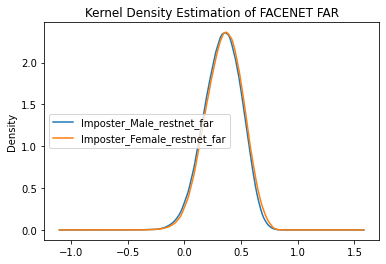

In [ ]:
ax = facenet_Imposter_Male.plot.kde(title="Kernel Density Estimation of FACENET FAR");
facenet_Imposter_Female.plot.kde(title="Kernel Density Estimation of FACENET FAR", ax=ax);

In [ ]:
from scipy import stats
data3 = facenet_Imposter_Male.to_numpy().flatten()
data4 = facenet_Imposter_Female.to_numpy().flatten()

In [ ]:
stats.ks_2samp(data3, data4,alternative='two-sided', mode='auto')

Ks_2sampResult(statistic=0.032216816464902875, pvalue=0.0)

In [ ]:
stats.ks_2samp(data3, data4,alternative='two-sided', mode='asymp')

Ks_2sampResult(statistic=0.032216816464902875, pvalue=0.0)

In [ ]:
stats.ks_2samp(data3, data4,alternative='two-sided', mode='exact')

Ks_2sampResult(statistic=0.03221681646490288, pvalue=1.0)